In [1]:
import logging
import pandas as pd

logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)

console_handler = logging.StreamHandler()
console_handler.setLevel(logging.DEBUG)

file_handler = logging.FileHandler('telecom_debug.log')
file_handler.setLevel(logging.DEBUG)

formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
console_handler.setFormatter(formatter)
file_handler.setFormatter(formatter)

logger.addHandler(console_handler)
logger.addHandler(file_handler)

def load_and_log_telecom_data():
    try:
        logger.info("Loading the telecom dataset")
        
        df = pd.read_csv('telcom_data (2).xlsx - Sheet1.csv')
        
        logger.debug("Dataset loaded successfully")
        logger.info("First few rows of the dataset:")
        logger.debug("\n%s", df.head())

        logger.info("Summary statistics of the dataset:")
        logger.debug("\n%s", df.describe())

        return df
    
    except Exception as e:
        logger.error("Failed to load the telecom data: %s", e)
        raise
if __name__ == "__main__":
    telecom_df = load_and_log_telecom_data()


2025-04-23 14:24:58,342 - __main__ - INFO - Loading the telecom dataset
2025-04-23 14:25:00,786 - __main__ - DEBUG - Dataset loaded successfully
2025-04-23 14:25:00,788 - __main__ - INFO - First few rows of the dataset:
2025-04-23 14:25:00,791 - __main__ - DEBUG - 
      Bearer Id          Start  Start ms            End  End ms  Dur. (ms)  \
0  1.311450e+19   4/4/19 12:01     770.0  4/25/19 14:35   662.0  1823652.0   
1  1.311450e+19   4/9/19 13:04     235.0   4/25/19 8:15   606.0  1365104.0   
2  1.311450e+19   4/9/19 17:42       1.0  4/25/19 11:58   652.0  1361762.0   
3  1.311450e+19   4/10/19 0:31     486.0   4/25/19 7:36   171.0  1321509.0   
4  1.311450e+19  4/12/19 20:10     565.0  4/25/19 10:40   954.0  1089009.0   

           IMSI  MSISDN/Number          IMEI Last Location Name  ...  \
0  2.082014e+14   3.366496e+10  3.552121e+13        9.16457E+15  ...   
1  2.082019e+14   3.368185e+10  3.579401e+13            L77566A  ...   
2  2.082003e+14   3.376063e+10  3.528151e+13     

In [2]:
import pandas as pd
pd.pandas.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import euclidean
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [3]:
df=pd.read_csv('telcom_data (2).xlsx - Sheet1.csv')

In [4]:
df

Bearer Id          Start  Start ms            End  End ms  \
0       1.311450e+19   4/4/19 12:01     770.0  4/25/19 14:35   662.0   
1       1.311450e+19   4/9/19 13:04     235.0   4/25/19 8:15   606.0   
2       1.311450e+19   4/9/19 17:42       1.0  4/25/19 11:58   652.0   
3       1.311450e+19   4/10/19 0:31     486.0   4/25/19 7:36   171.0   
4       1.311450e+19  4/12/19 20:10     565.0  4/25/19 10:40   954.0   
...              ...            ...       ...            ...     ...   
149996  7.277830e+18   4/29/19 7:28     451.0   4/30/19 6:02   214.0   
149997  7.349880e+18   4/29/19 7:28     483.0  4/30/19 10:41   187.0   
149998  1.311450e+19   4/29/19 7:28     283.0  4/30/19 10:46   810.0   
149999  1.311450e+19   4/29/19 7:28     696.0  4/30/19 10:40   327.0   
150000           NaN            NaN       NaN            NaN     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0       1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1       1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2       1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3       1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4       1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   
...           ...           ...            ...           ...   
149996    81230.0  2.082022e+14   3.365069e+10  3.548311e+13   
149997    97970.0  2.082019e+14   3.366345e+10  3.566051e+13   
149998    98249.0  2.082017e+14   3.362189e+10  3.572121e+13   
149999    97910.0  2.082021e+14   3.361962e+10  8.618620e+13   
150000        NaN           NaN            NaN           NaN   

       Last Location Name  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0             9.16457E+15             42.0              5.0   
1                 L77566A             65.0              5.0   
2                 D42335A              NaN              NaN   
3                 T21824A              NaN              NaN   
4                 D88865A              NaN              NaN   
...                   ...              ...              ...   
149996            D20434A             32.0              0.0   
149997            D10223C             27.0              2.0   
149998            T51102A             43.0              6.0   
149999            L88342B             37.0              5.0   
150000                NaN              NaN              NaN   

        Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0                          23.0                     44.0   
1                          16.0                     26.0   
2                           6.0                      9.0   
3                          44.0                     44.0   
4                           6.0                      9.0   
...                         ...                      ...   
149996                     52.0                     65.0   
149997                     23.0                     54.0   
149998                     43.0                     47.0   
149999                     34.0                     37.0   
150000                      NaN                      NaN   

        TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0                               NaN                          NaN   
1                               NaN                          NaN   
2                               NaN                          NaN   
3                               NaN                          NaN   
4                               NaN                          NaN   
...                             ...                          ...   
149996                          NaN                          NaN   
149997                          NaN                          NaN   
149998                          NaN                          NaN   
149999                          NaN                          NaN   
150000                          NaN                          NaN   

        DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
0                  

In [5]:
df.head()

Bearer Id          Start  Start ms            End  End ms  Dur. (ms)  \
0  1.311450e+19   4/4/19 12:01     770.0  4/25/19 14:35   662.0  1823652.0   
1  1.311450e+19   4/9/19 13:04     235.0   4/25/19 8:15   606.0  1365104.0   
2  1.311450e+19   4/9/19 17:42       1.0  4/25/19 11:58   652.0  1361762.0   
3  1.311450e+19   4/10/19 0:31     486.0   4/25/19 7:36   171.0  1321509.0   
4  1.311450e+19  4/12/19 20:10     565.0  4/25/19 10:40   954.0  1089009.0   

           IMSI  MSISDN/Number          IMEI Last Location Name  \
0  2.082014e+14   3.366496e+10  3.552121e+13        9.16457E+15   
1  2.082019e+14   3.368185e+10  3.579401e+13            L77566A   
2  2.082003e+14   3.376063e+10  3.528151e+13            D42335A   
3  2.082014e+14   3.375034e+10  3.535661e+13            T21824A   
4  2.082014e+14   3.369980e+10  3.540701e+13            D88865A   

   Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
0             42.0              5.0                     23.0   
1             65.0              5.0                     16.0   
2              NaN              NaN                      6.0   
3              NaN              NaN                     44.0   
4              NaN              NaN                      6.0   

   Avg Bearer TP UL (kbps)  TCP DL Retrans. Vol (Bytes)  \
0                     44.0                          NaN   
1                     26.0                          NaN   
2                      9.0                          NaN   
3                     44.0                          NaN   
4                      9.0                          NaN   

   TCP UL Retrans. Vol (Bytes)  DL TP < 50 Kbps (%)  \
0                          NaN                100.0   
1                          NaN                100.0   
2                          NaN                100.0   
3                          NaN                100.0   
4                          NaN                100.0   

   50 Kbps < DL TP < 250 Kbps (%)  250 Kbps < DL TP < 1 Mbps (%)  \
0                             0.0                            0.0   
1                             0.0                            0.0   
2                             0.0                            0.0   
3                             0.0                            0.0   
4                             0.0                            0.0   

   DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  10 Kbps < UL TP < 50 Kbps (%)  \
0                 0.0                100.0                            0.0   
1                 0.0                100.0                            0.0   
2                 0.0                100.0                            0.0   
3                 0.0                100.0                            0.0   
4                 0.0                100.0                            0.0   

   50 Kbps < UL TP < 300 Kbps (%)  UL TP > 300 Kbps (%)  HTTP DL (Bytes)  \
0                             0.0                   0.0              NaN   
1                             0.0                   0.0              NaN   
2                             0.0                   0.0              NaN   
3                             0.0                   0.0              NaN   
4                             0.0                   0.0              NaN   

   HTTP UL (Bytes)  Activity Duration DL (ms)  Activity Duration UL (ms)  \
0              NaN                    37624.0                    38787.0   
1              NaN                      168.0                     3560.0   
2              NaN                        0.0                        0.0   
3              NaN                     3330.0                    37882.0   
4              NaN                        0.0                        0.0   

    Dur. (ms).1 Handset Manufacturer                 Handset Type  \
0  1.823653e+09              Samsung   Samsung Galaxy A5 Sm-A520F   
1  1.365104e+09              Samsung  Samsung Galaxy J5 (Sm-J530)   
2  1.361763e+09              Samsung     Samsung Galaxy A8 (2018)   
3

In [6]:
df.describe()

Bearer Id       Start ms         End ms     Dur. (ms)          IMSI  \
count  1.490100e+05  150000.000000  150000.000000  1.500000e+05  1.494310e+05   
mean   1.013887e+19     499.188200     498.800880  1.046086e+05  2.082016e+14   
std    2.893170e+18     288.611834     288.097653  8.103762e+04  2.148809e+10   
min    6.917540e+18       0.000000       0.000000  7.142000e+03  2.040471e+14   
25%    7.349880e+18     250.000000     251.000000  5.744050e+04  2.082014e+14   
50%    7.349880e+18     499.000000     500.000000  8.639900e+04  2.082015e+14   
75%    1.304240e+19     749.000000     750.000000  1.324302e+05  2.082018e+14   
max    1.318650e+19     999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.489350e+05  1.494290e+05    122172.000000    122189.000000   
mean    4.188282e+10  4.847455e+13       109.795706        17.662883   
std     2.447443e+12  2.241637e+13       619.782739        84.793524   
min     3.360100e+10  4.400152e+11         0.000000         0.000000   
25%     3.365130e+10  3.546071e+13        32.000000         2.000000   
50%     3.366371e+10  3.572201e+13        45.000000         5.000000   
75%     3.368349e+10  8.611970e+13        70.000000        15.000000   
max     8.823971e+14  9.900120e+13     96923.000000      7120.000000   

       Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
count            150000.000000            150000.000000   
mean              13300.045927              1770.428647   
std               23971.878541              4625.355500   
min                   0.000000                 0.000000   
25%                  43.000000                47.000000   
50%                  63.000000                63.000000   
75%               19710.750000              1120.000000   
max              378160.000000             58613.000000   

       TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
count                 6.185500e+04                 5.335200e+04   
mean                  2.080991e+07                 7.596587e+05   
std                   1.825665e+08                 2.645305e+07   
min                   2.000000e+00                 1.000000e+00   
25%                   3.565150e+04                 4.694750e+03   
50%                   5.687300e+05                 2.094950e+04   
75%                   3.768308e+06                 8.402025e+04   
max                   4.294426e+09                 2.908226e+09   

       DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
count        149247.000000                   149247.000000   
mean             92.844754                        3.069355   
std              13.038031                        6.215233   
min               0.000000                        0.000000   
25%              91.000000                        0.000000   
50%             100.000000                        0.000000   
75%             100.000000                        4.000000   
max             100.000000                       93.000000   

       250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  \
count                  149247.000000       149247.000000        149209.000000   
mean                        1.717341            1.609654            98.530142   
std                         4.159538            4.828890             4.634285   
min                         0.000000            0.000000             0.000000   
25%                         0.000000            0.000000            99.000000   
50%                         0.000000            0.000000           100.000000   
75%                         1.000000            0.000000           100.000000   
max                       100.000000           94.000000           100.000000   

       10 Kbps < UL TP < 50 Kbps (%)  50 Kbps < UL TP < 300 Kbps (%)  \
count                  149209.000000                   149209.000000   
mean                        0.776749                        0.

In [7]:
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [8]:
df.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

## Removing Null/NAN Values

In [10]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True) # Fill categorical with mode
    else:
        df[col].fillna(df[col].median(), inplace=True) # Fill numerical with median

In [11]:
df.isnull().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

## Outliers

In [13]:
numerical_column = df.select_dtypes(include=['number']).columns
for i in numerical_column:
    Q1 = df[i].quantile(0.25)
    print("The first quantile for the column", i, "is given by", Q1)
    Q2 = df[i].quantile(0.50)
    print("The second quantile for the column", i, "is given by", Q2)
    Q3 = df[i].quantile(0.75)
    print("The third quantile for the column", i, "is given by", Q3)
    IQR = Q3 - Q1
    print("The interquartile range for the column", i, "is given by", IQR)
    LL = Q1 - 1.5 * IQR
    print("The lower limit for the column", i, "is given by", LL)
    UL = Q3 + 1.5 * IQR
    print("The upper limit for the column", i, "is given by", UL)
    n = df[(df[i] < LL) | (df[i] > UL)].shape[0]
    print("The number of outliers for column", i, "is given by", n)
    df[i] = np.where((df[i] < LL) | (df[i] > UL), df[i].mean(), df[i])
    m = df[(df[i] < LL) | (df[i] > UL)].shape[0]
    print("The number of outliers after imputation for column", i, "is given by", m)
    print("   ")
    print("   ")

The first quantile for the column Bearer Id is given by 7.34988e+18
The second quantile for the column Bearer Id is given by 7.34988e+18
The third quantile for the column Bearer Id is given by 1.30424e+19
The interquartile range for the column Bearer Id is given by 5.69252e+18
The lower limit for the column Bearer Id is given by -1.1889e+18
The upper limit for the column Bearer Id is given by 2.158118e+19
The number of outliers for column Bearer Id is given by 0
The number of outliers after imputation for column Bearer Id is given by 0
   
   
The first quantile for the column Start ms is given by 250.0
The second quantile for the column Start ms is given by 499.0
The third quantile for the column Start ms is given by 749.0
The interquartile range for the column Start ms is given by 499.0
The lower limit for the column Start ms is given by -498.5
The upper limit for the column Start ms is given by 1497.5
The number of outliers for column Start ms is given by 0
The number of outliers af

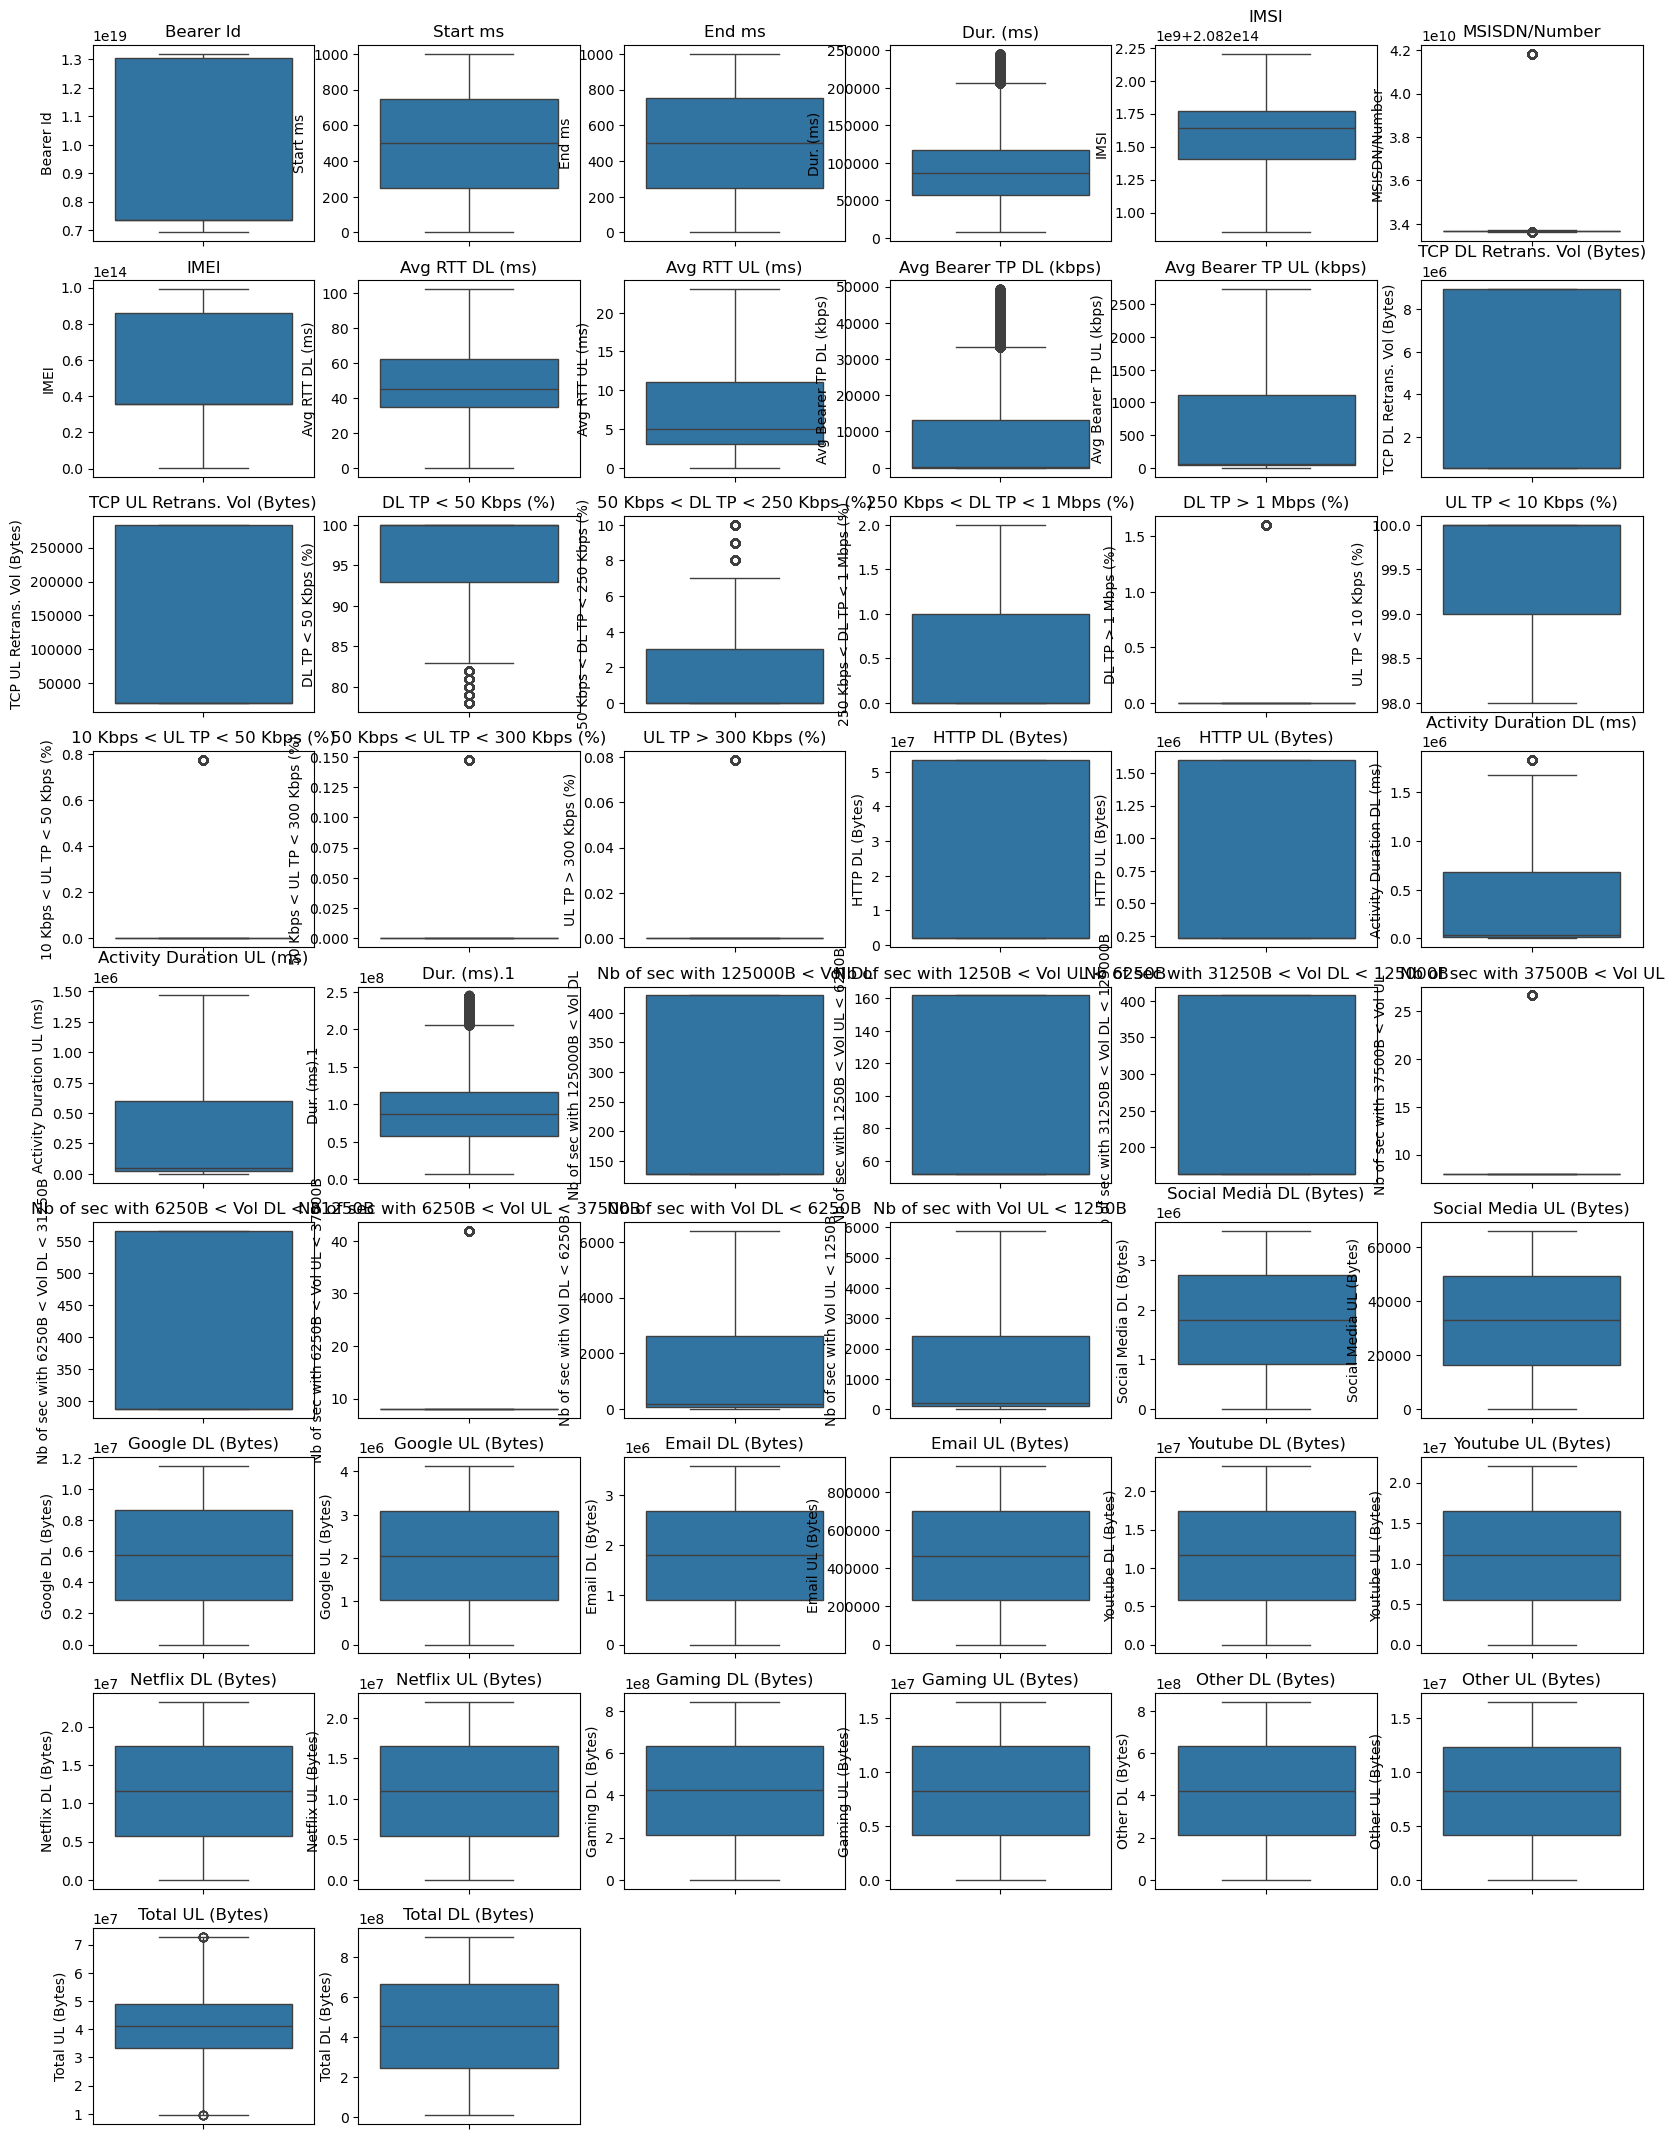

In [14]:
numerical = df.select_dtypes(include=['number']).columns
num_cols = 6  # Define the number of columns per row
num_rows = math.ceil(len(numerical) / num_cols)  # Ensure correct row calculation
plt.figure(figsize=(20, num_rows * 3)) 
for i, col in enumerate(numerical, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=df[col])
    plt.title(col)

## Removing Outliers

In [16]:
def iqr_clip(df, col):
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    df[col] = np.clip(df[col], lower_bound, upper_bound)  # Clip values to IQR range
    return df

In [17]:
cols_to_clip = ['Dur. (ms).1','MSISDN/Number','Avg Bearer TP DL (kbps)','DL TP < 50 Kbps (%)',
                '50 Kbps < DL TP < 250 Kbps (%)','Activity Duration DL (ms)','Total UL (Bytes)','Dur. (ms)']
# Apply IQR clipping to each column
for col in cols_to_clip:
    if col in df.columns:
        df = iqr_clip(df, col)

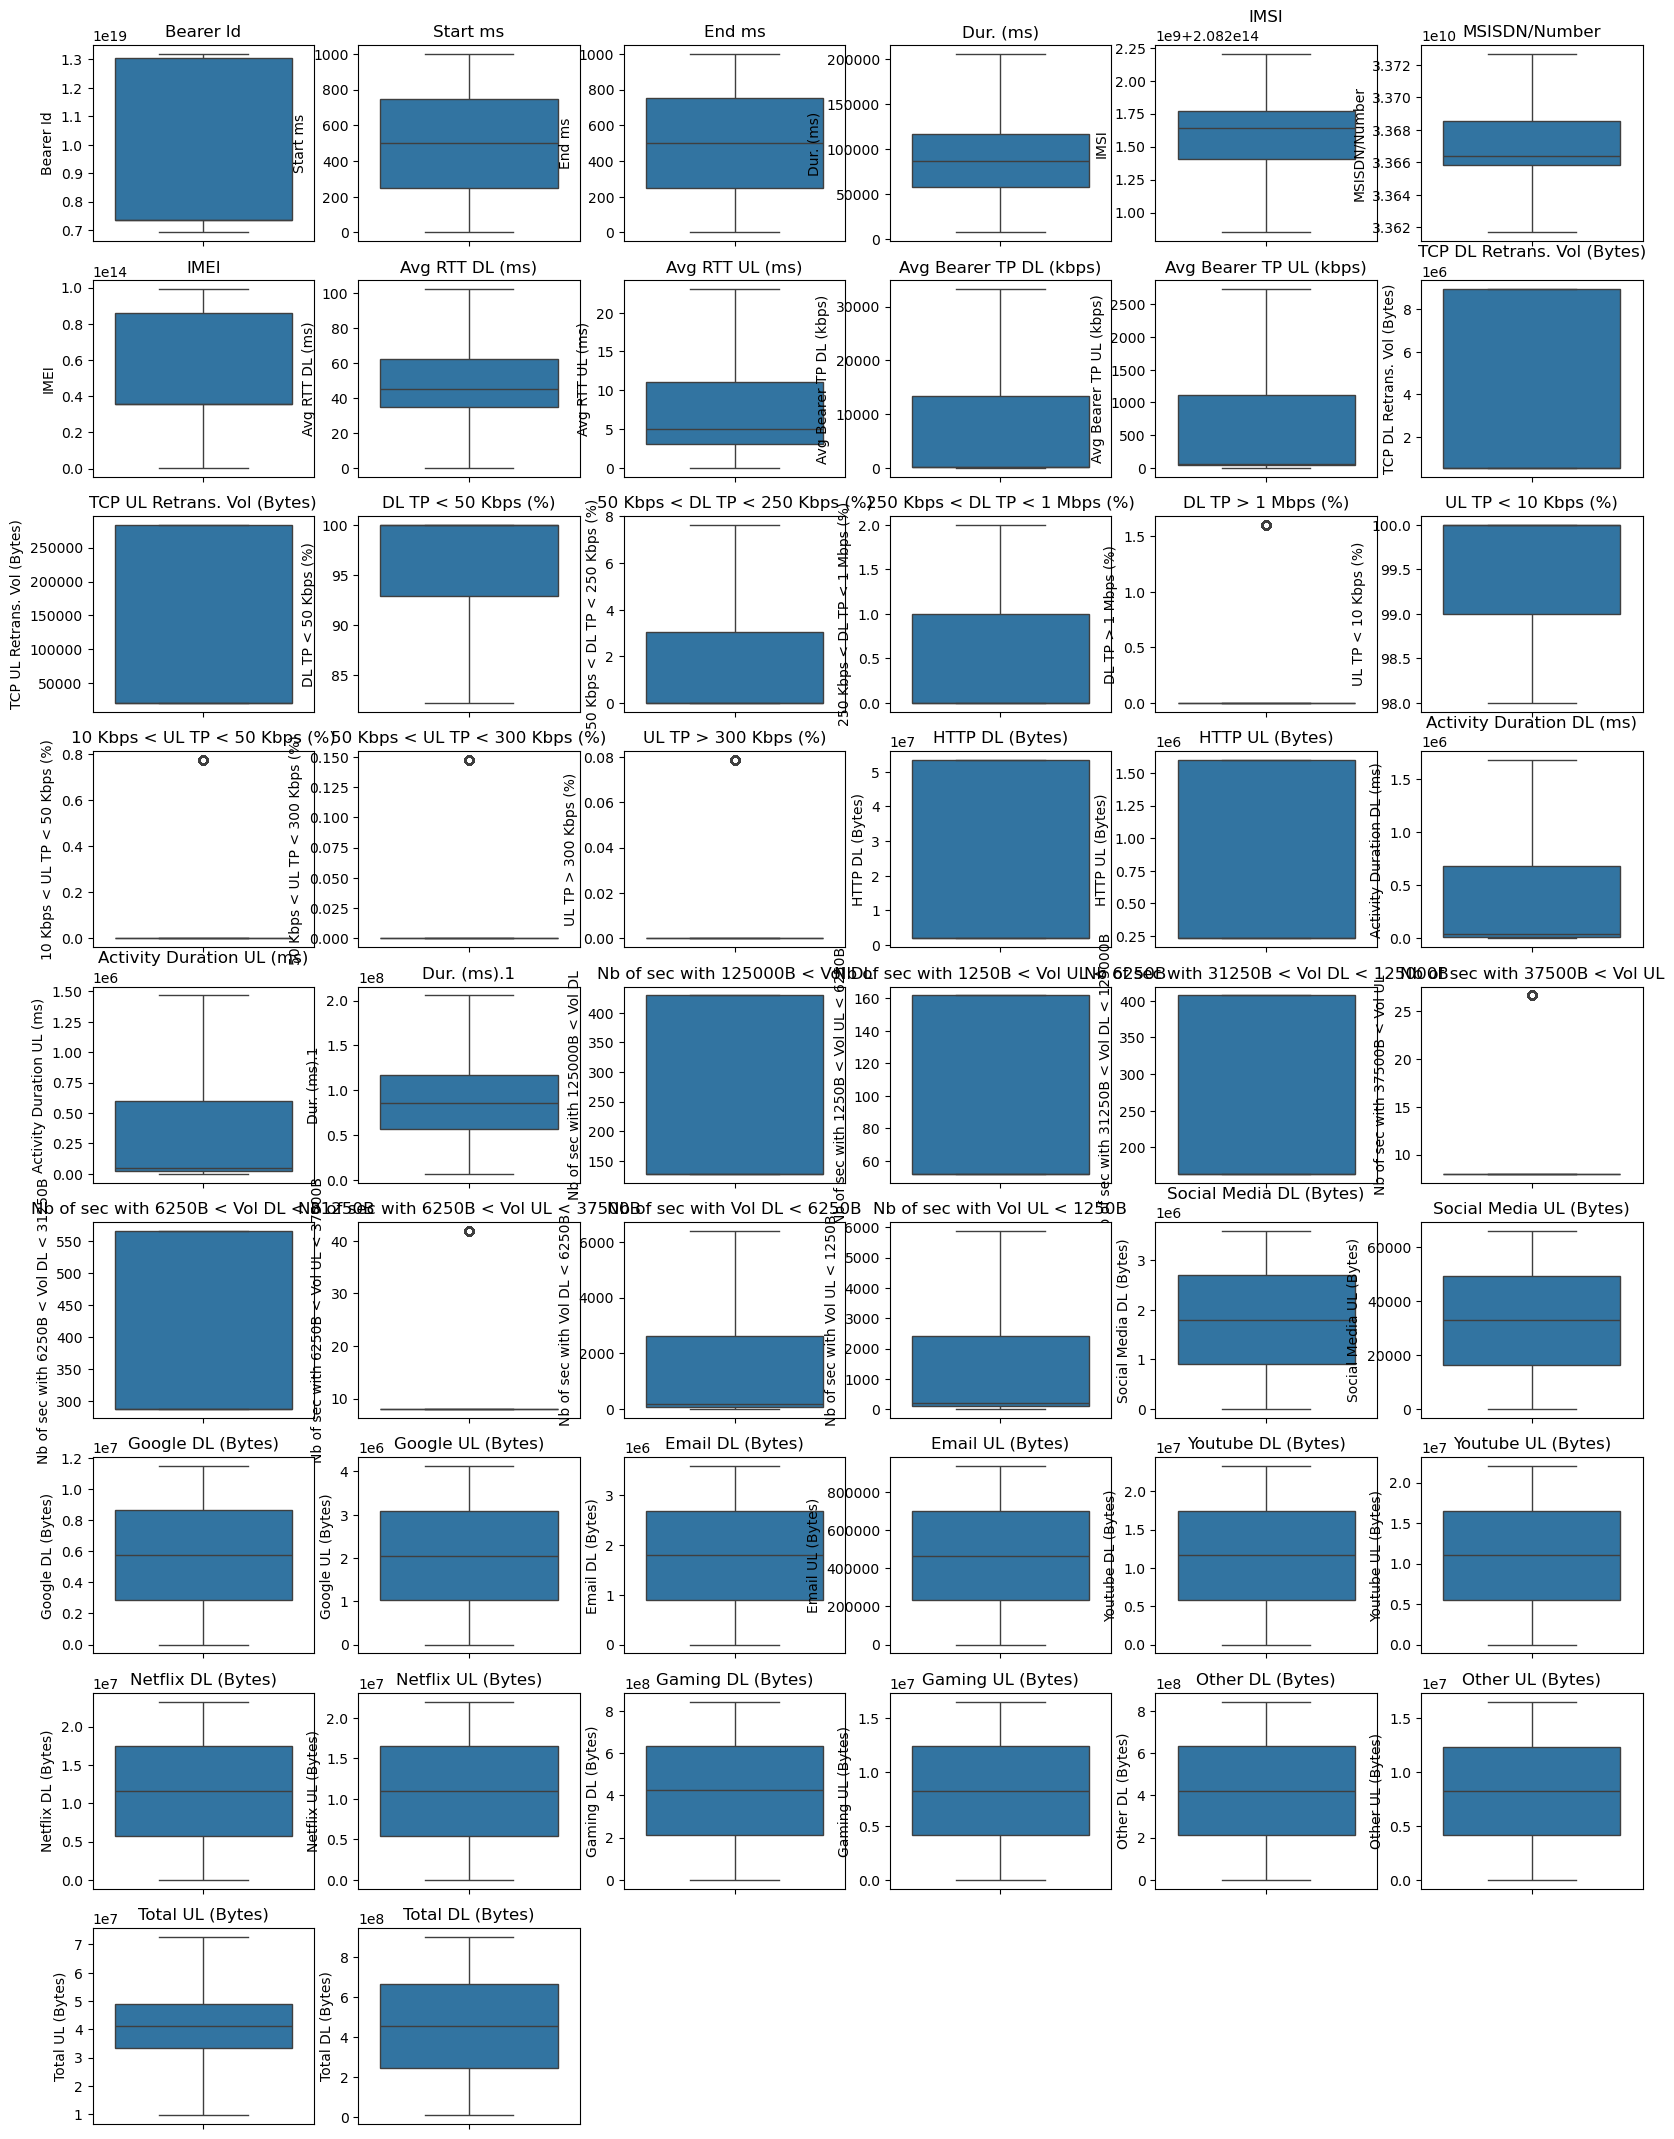

In [18]:
numerical = df.select_dtypes(include=['number']).columns
num_cols = 6  # Define the number of columns per row
num_rows = math.ceil(len(numerical) / num_cols)  # math.ceil() ensures that no column gets left out.
plt.figure(figsize=(20, num_rows * 3)) 
for i, col in enumerate(numerical, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=df[col])
    plt.title(col)

## Task 1

In [20]:
# Top 10 handsets
top_10_handsets = df["Handset Type"].value_counts().head(10)
top_10_handsets

Handset Type
Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64

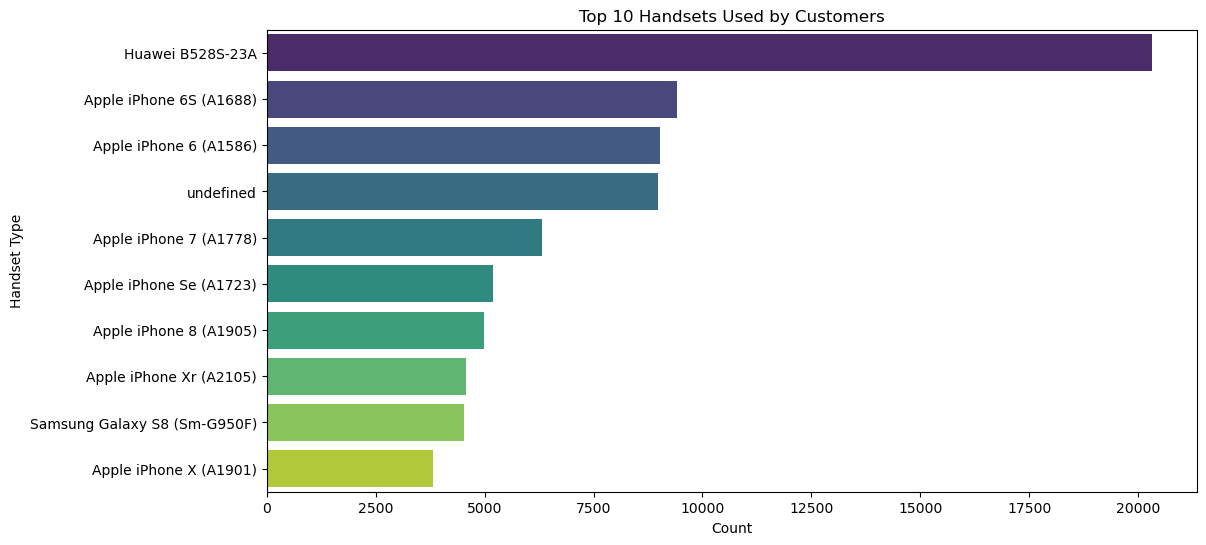

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_handsets.values, y=top_10_handsets.index, palette="viridis") #palette = "viridis" → a visually appealing color gradient.
plt.xlabel("Count")
plt.ylabel("Handset Type")
plt.title("Top 10 Handsets Used by Customers")
plt.show()

In [22]:
# Top 3 handset manufacturers
top_3_manufacturers = df["Handset Manufacturer"].value_counts().head(3)
top_3_manufacturers

Handset Manufacturer
Apple      60137
Samsung    40839
Huawei     34423
Name: count, dtype: int64

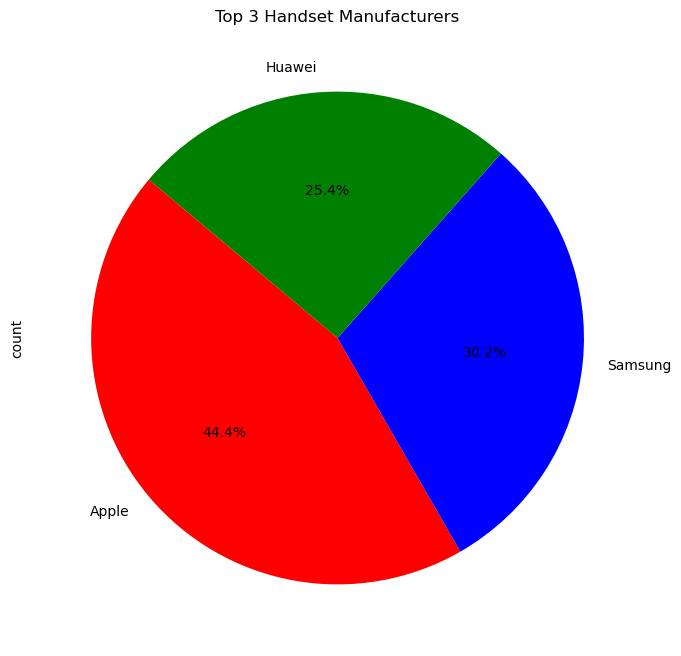

In [23]:
plt.figure(figsize=(8, 8))
top_3_manufacturers.plot(kind="pie", autopct="%1.1f%%", colors=["red", "blue", "green"], startangle=140)
#startangle=140:Rotates the start of the pie chart by 140 degrees(usually the bottom-left).
plt.title("Top 3 Handset Manufacturers")
plt.show()

In [24]:
# Top 5 handsets per top 3 manufacturers
handsets_per_manufacturer = df[df["Handset Manufacturer"].isin(top_3_manufacturers.index)]
top_5_per_manufacturer = handsets_per_manufacturer.groupby("Handset Manufacturer")["Handset Type"].value_counts().groupby(level=0).head(5)
top_5_per_manufacturer

Handset Manufacturer  Handset Type                  
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Huawei                Huawei B528S-23A                  19752
                      Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2021
                      Huawei P20                         1480
                      Huawei Y6 2018                      997
Samsung               Samsung Galaxy S8 (Sm-G950F)       4520
                      Samsung Galaxy A5 Sm-A520F         3724
                      Samsung Galaxy J5 (Sm-J530)        3696
                      Samsung Galaxy J3 (Sm-J330)        3484
                      Samsung Galaxy S7 (Sm-G930X)       3199
Name: count, dtyp

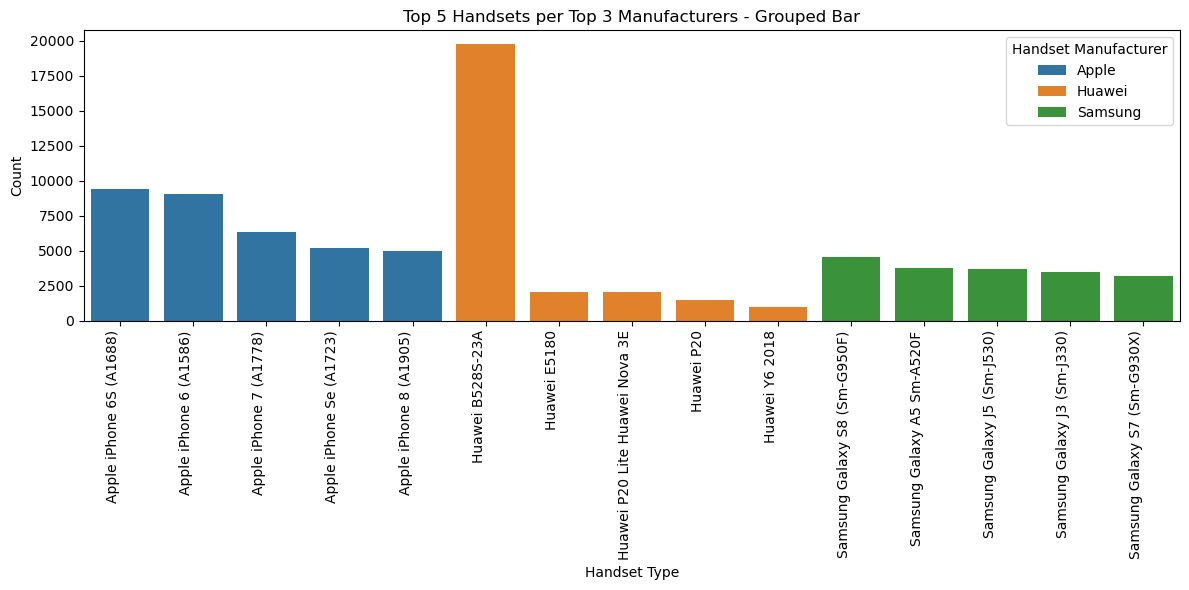

In [25]:
# 3. Facet Plot (one subplot per manufacturer)
top_5_df = top_5_per_manufacturer.reset_index(name='Count')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_5_df,x='Handset Type',y='Count',hue='Handset Manufacturer')
plt.xticks(rotation=90, ha='right')
plt.title("Top 5 Handsets per Top 3 Manufacturers - Grouped Bar")
plt.tight_layout()
plt.show()

## Short interpretation and recommendation to marketing teams 

## Recommendation:

### **Targeted Marketing Campaigns:**

###### **Create device-specific promotions and bundles (e.g., data plans optimized for top models).**

###### **Use push notifications or in-app messages tailored to users based on their handset type.**

### **Partnership Opportunities:**

###### **Consider strategic partnerships with the Top 3 handset manufacturers for co-branded promotions or device trade-in programs.**

### **App Optimization & Support:**

###### **Ensure TellCo’s mobile app and digital services are fully optimized for these top 15 devices to enhance user experience.**

### **Customer Retention Offers:**

###### **Use handset information to offer loyalty rewards to users with popular models, encouraging continued usage and preventing churn.**

## Task 1.1

In [29]:
# Aggregate user behavior per application
user_behavior = df.groupby(['MSISDN/Number', 'Social Media DL (Bytes)','Social Media UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)',
                            'Email DL (Bytes)','Email UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)',
                            'Netflix UL (Bytes)','Gaming DL (Bytes)','Gaming UL (Bytes)']) \
    .agg(
        xdr_session_count=('Bearer Id', 'count'),  # Number of xDR sessions
        total_session_duration=('Dur. (ms)', 'sum'),  # Total session duration
        total_dl=('Total DL (Bytes)', 'sum'),  # Total download
        total_ul=('Total UL (Bytes)', 'sum'),  # Total upload
    )
# Calculate total data volume (DL + UL)
user_behavior['total_data_volume'] = user_behavior['total_dl'] + user_behavior['total_ul']
user_behavior = user_behavior.reset_index() # Reset index for easier export or merging
print(user_behavior.head())


   MSISDN/Number  Social Media DL (Bytes)  Social Media UL (Bytes)  \
0   3.361671e+10                    459.0                  12691.0   
1   3.361671e+10                    488.0                  53140.0   
2   3.361671e+10                    964.0                  12024.0   
3   3.361671e+10                   1231.0                  61756.0   
4   3.361671e+10                   1421.0                  14069.0   

   Google DL (Bytes)  Google UL (Bytes)  Email DL (Bytes)  Email UL (Bytes)  \
0          1827383.0          3761217.0          855796.0          853308.0   
1          8083205.0          3312141.0          268564.0          421199.0   
2          8538255.0          2383618.0         1467998.0          919912.0   
3          5726697.0          2461804.0         2114552.0          196650.0   
4          4262366.0          2799982.0         2670295.0          718320.0   

   Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
0          21686440.0          17529528

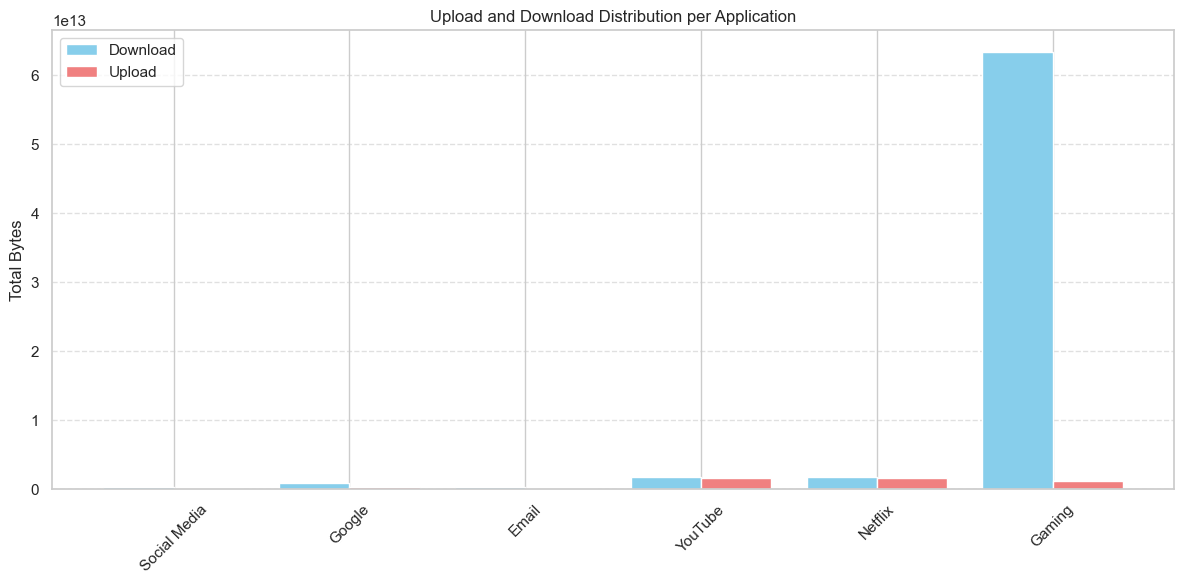

In [30]:
# Prepare data for plotting
app_usage = {
    'Application': ['Social Media', 'Google', 'Email', 'YouTube', 'Netflix', 'Gaming'],
    'Download (Bytes)': [
        user_behavior['Social Media DL (Bytes)'].sum(),
        user_behavior['Google DL (Bytes)'].sum(),
        user_behavior['Email DL (Bytes)'].sum(),
        user_behavior['Youtube DL (Bytes)'].sum(),
        user_behavior['Netflix DL (Bytes)'].sum(),
        user_behavior['Gaming DL (Bytes)'].sum()
    ],
    'Upload (Bytes)': [
        user_behavior['Social Media UL (Bytes)'].sum(),
        user_behavior['Google UL (Bytes)'].sum(),
        user_behavior['Email UL (Bytes)'].sum(),
        user_behavior['Youtube UL (Bytes)'].sum(),
        user_behavior['Netflix UL (Bytes)'].sum(),
        user_behavior['Gaming UL (Bytes)'].sum()
    ]
}

# Convert to DataFrame
app_df = pd.DataFrame(app_usage)

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Bar positions
bar_width = 0.4
x = range(len(app_df))

# Plot bars
plt.bar(x, app_df['Download (Bytes)'], width=bar_width, label='Download', color='skyblue')
plt.bar([i + bar_width for i in x], app_df['Upload (Bytes)'], width=bar_width, label='Upload', color='lightcoral')

# X-axis labels
plt.xticks([i + bar_width / 2 for i in x], app_df['Application'], rotation=45)
plt.ylabel('Total Bytes')
plt.title('Upload and Download Distribution per Application')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


## Task 1.2

In [32]:
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
          Bearer Id       Start ms         End ms      Dur. (ms)  \
count  1.500010e+05  150001.000000  150001.000000  150001.000000   
mean   1.012045e+19     499.188199     498.800888   92329.689162   
std    2.892435e+18     288.610872     288.096693   47997.324360   
min    6.917540e+18       0.000000       0.000000    7142.000000   
25%    7.349880e+18     250.000000     251.000000   57442.000000   
50%    7.349880e+18     499.000000     500.000000   86399.000000   
75%    1.304240e+19     749.000000     750.000000  116737.000000   
max    1.318650e+19     999.000000     999.000000  205679.500000   

               IMSI  MSISDN/Number          IMEI  Avg RTT DL (ms)  \
count  1.500010e+05   1.500010e+05  1.500010e+05    150001.000000   
mean   2.082016e+14   3.366992e+10  4.842592e+13        51.162026   
std    3.310241e+08   3.202618e+07  2.238739e+13        23.398589   
min    2.082009e+14   3.361671e+10  4.400152e+11         0.000000   
25%    2.082014e+14   3

In [33]:
# Shows only the spread of the data
dispersion_metrics = df.describe().loc[["mean", "std", "min", "25%", "50%", "75%", "max"]]
print("\nDispersion Metrics:")
print(dispersion_metrics)


Dispersion Metrics:
         Bearer Id    Start ms      End ms      Dur. (ms)          IMSI  \
mean  1.012045e+19  499.188199  498.800888   92329.689162  2.082016e+14   
std   2.892435e+18  288.610872  288.096693   47997.324360  3.310241e+08   
min   6.917540e+18    0.000000    0.000000    7142.000000  2.082009e+14   
25%   7.349880e+18  250.000000  251.000000   57442.000000  2.082014e+14   
50%   7.349880e+18  499.000000  500.000000   86399.000000  2.082016e+14   
75%   1.304240e+19  749.000000  750.000000  116737.000000  2.082018e+14   
max   1.318650e+19  999.000000  999.000000  205679.500000  2.082022e+14   

      MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
mean   3.366992e+10  4.842592e+13        51.162026          7.13594   
std    3.202618e+07  2.238739e+13        23.398589          5.59520   
min    3.361671e+10  4.400152e+11         0.000000          0.00000   
25%    3.365801e+10  3.546261e+13        35.000000          3.00000   
50%    3.366391e+10  3.

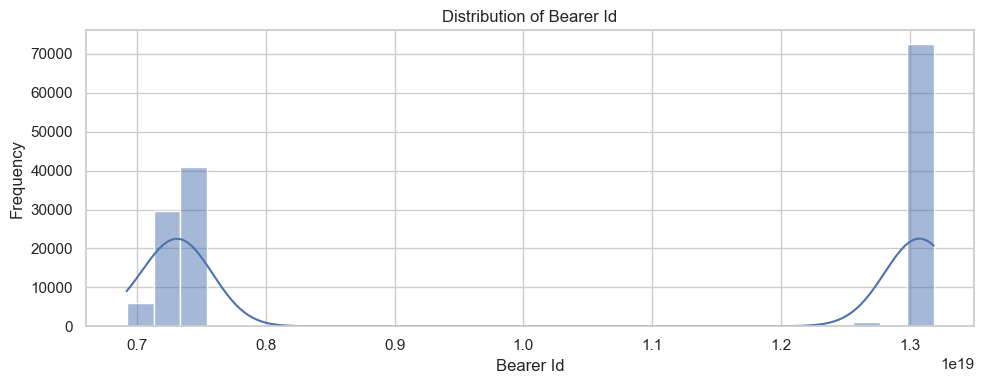

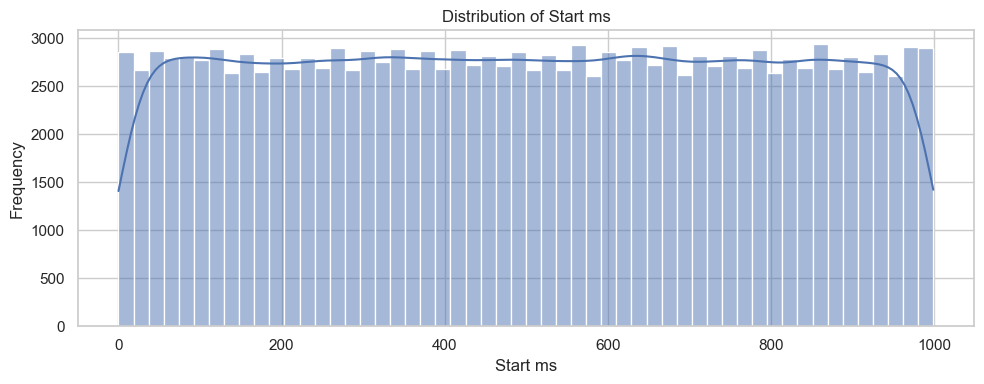

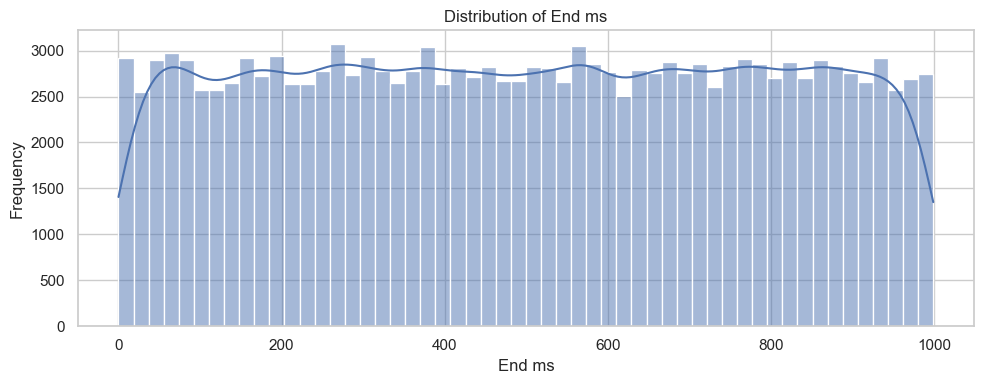

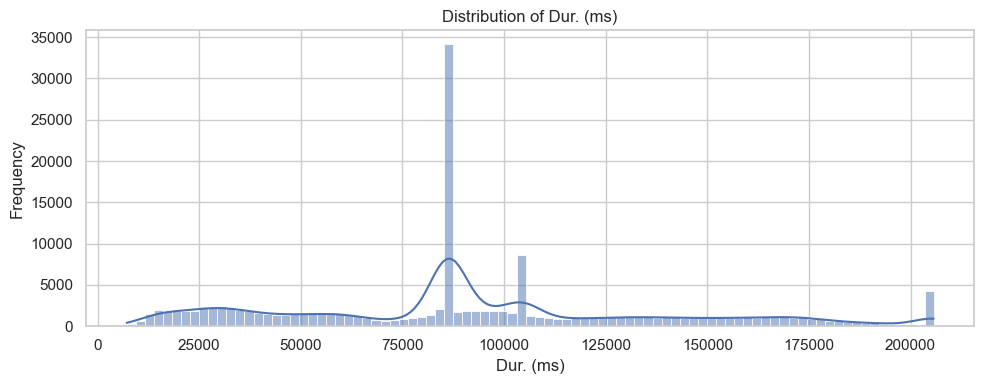

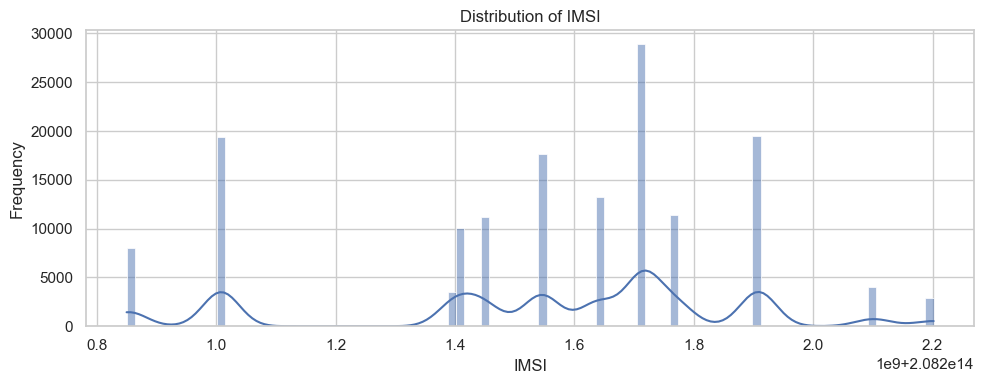

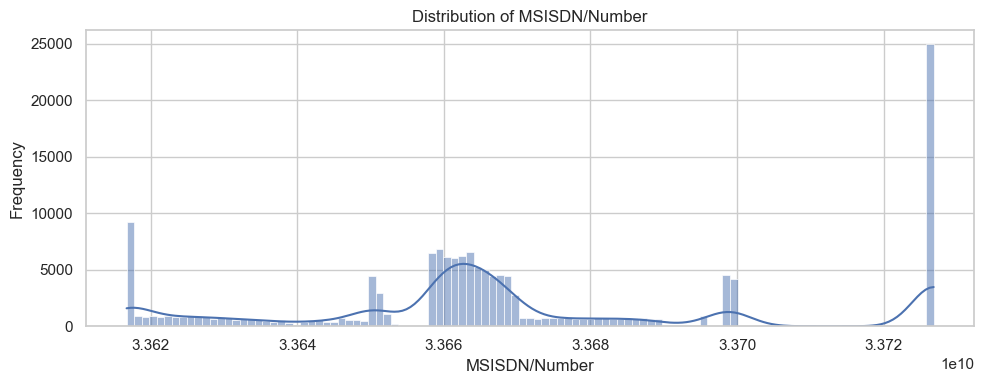

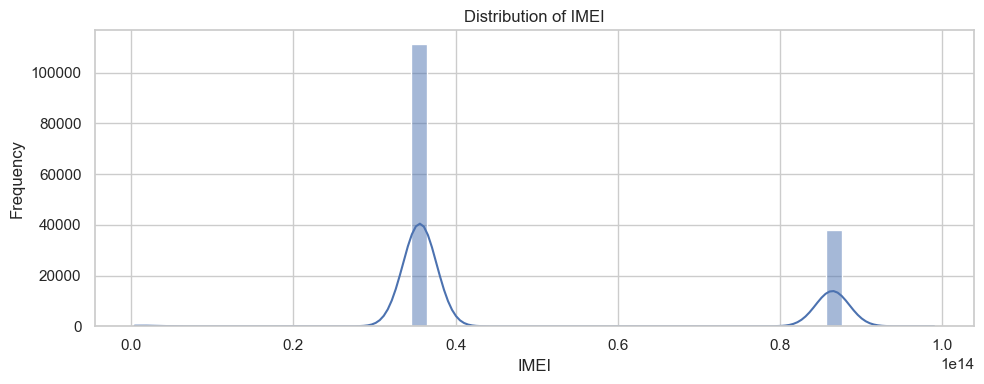

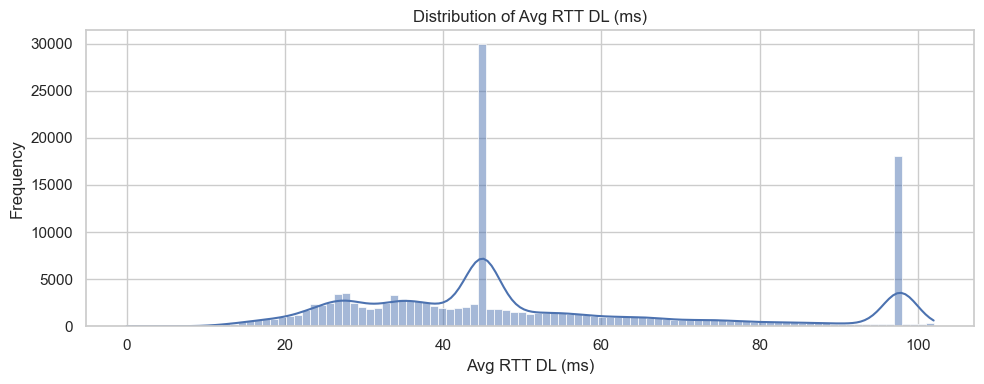

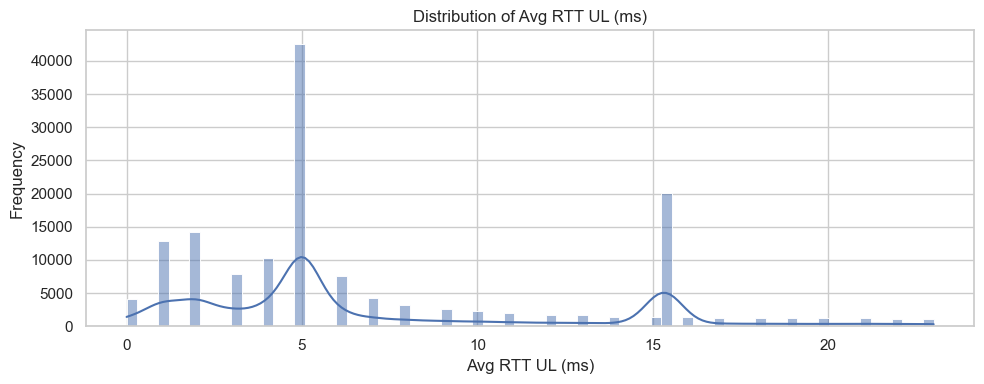

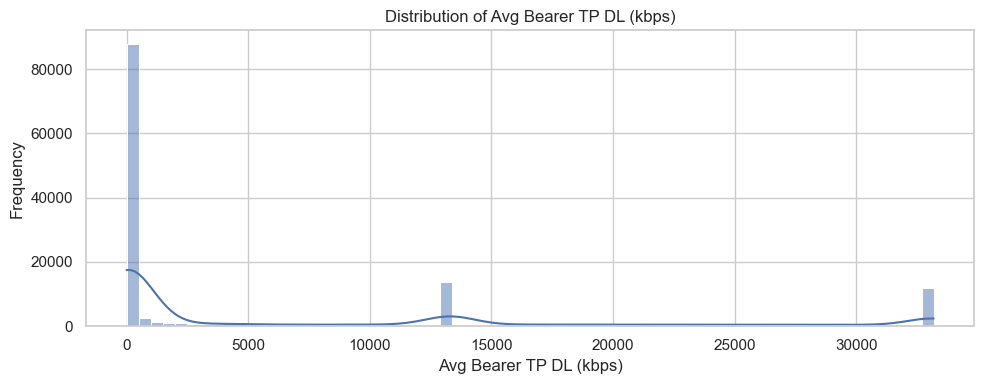

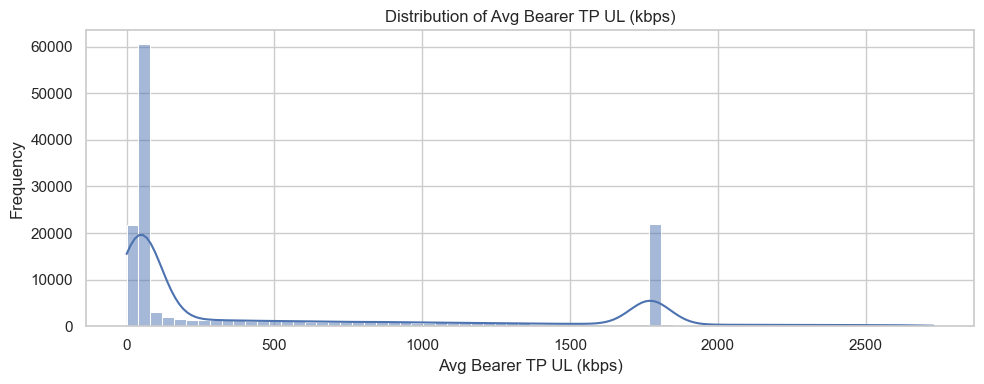

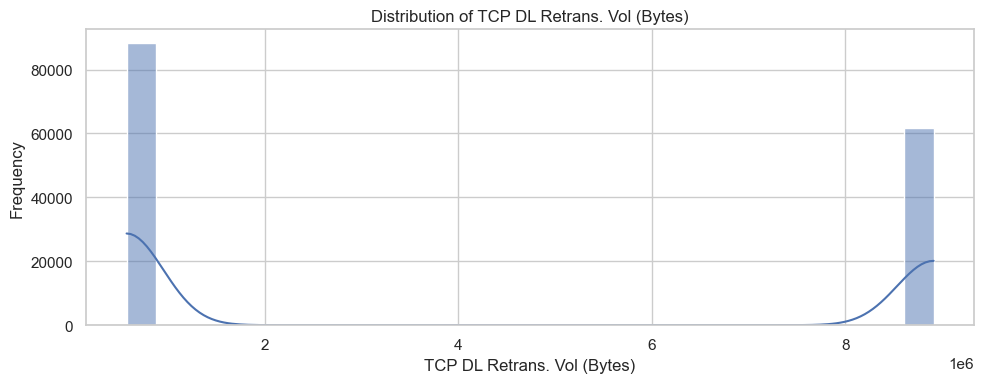

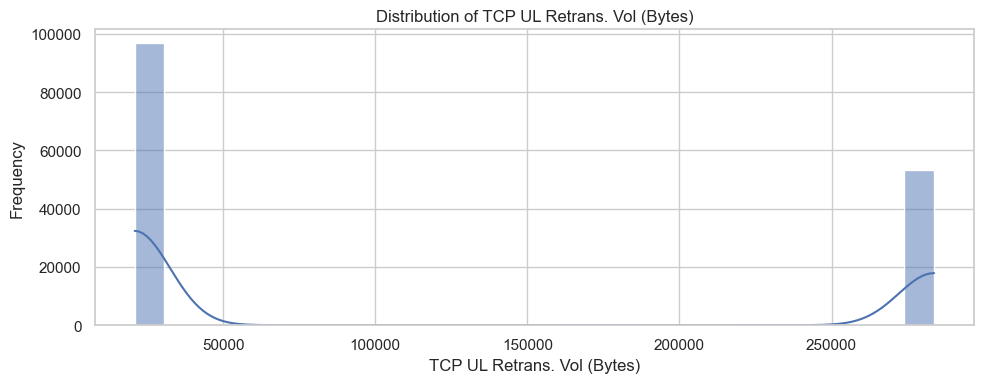

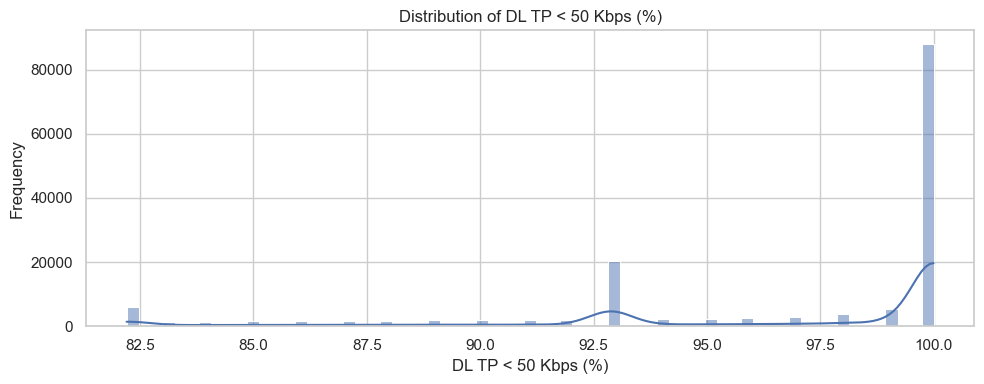

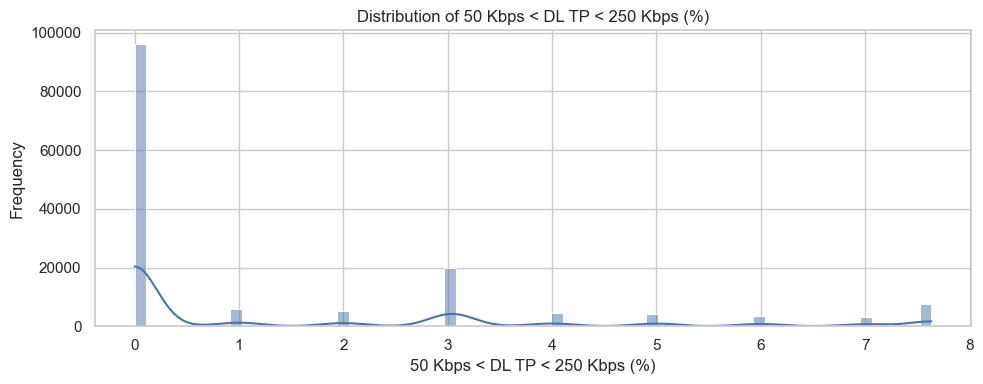

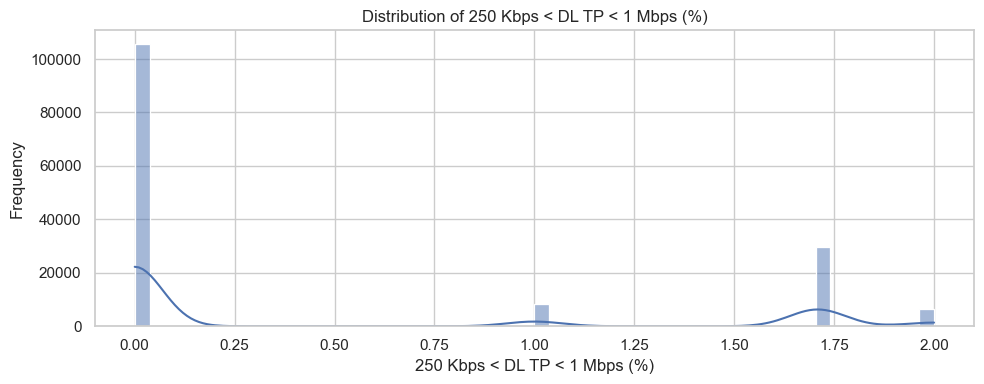

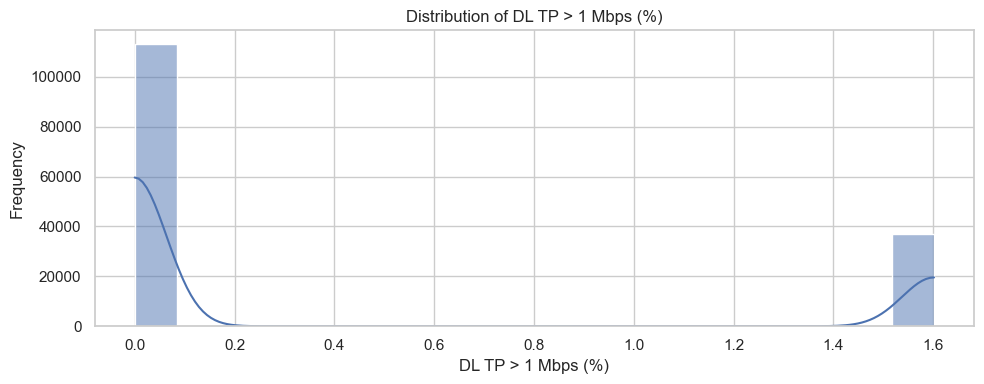

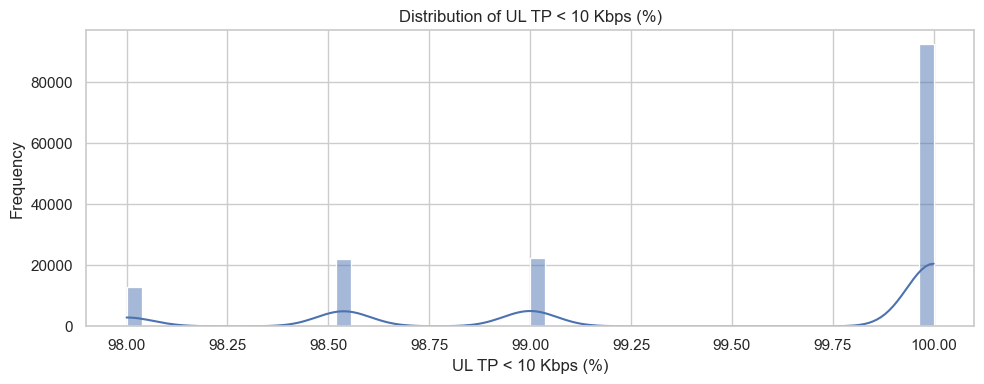

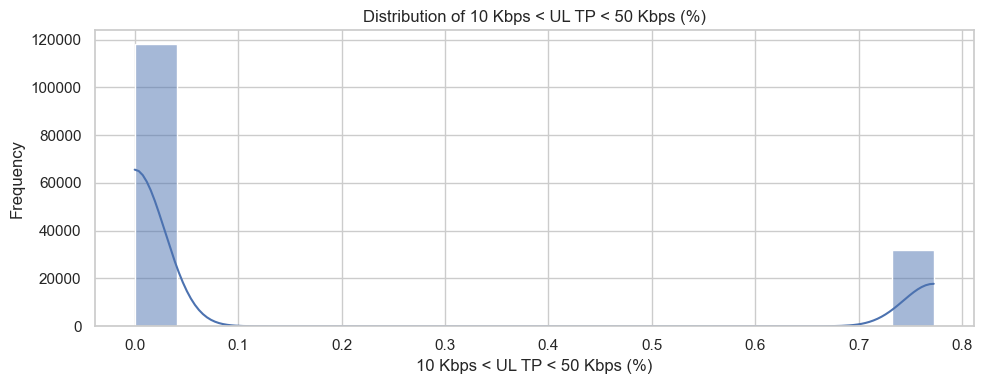

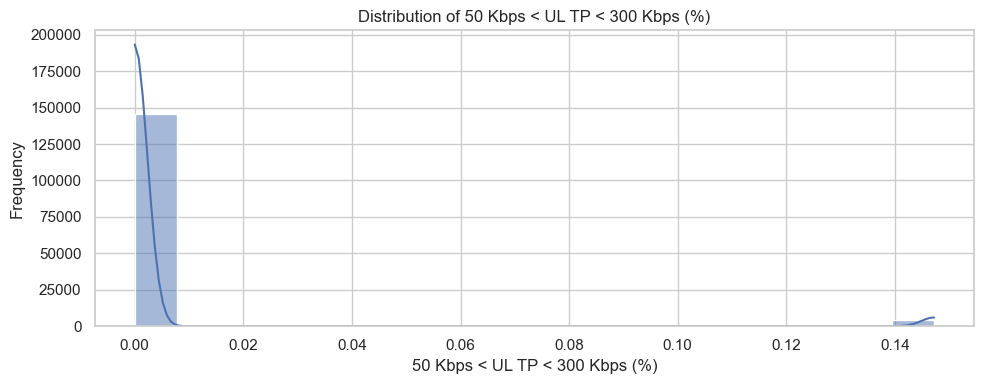

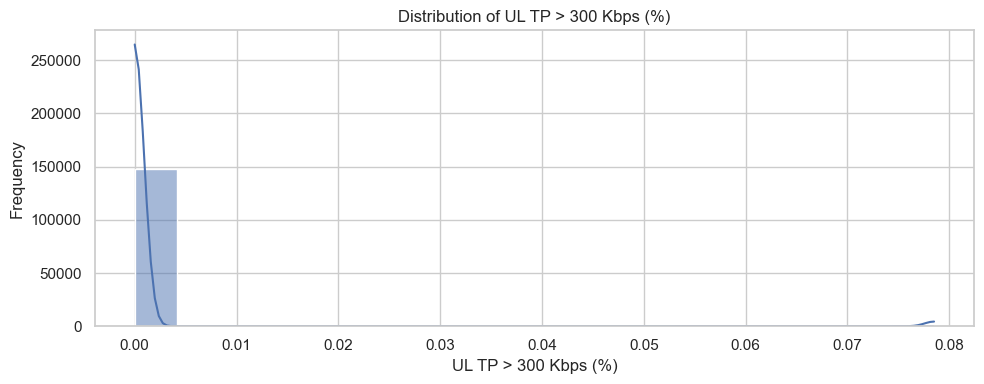

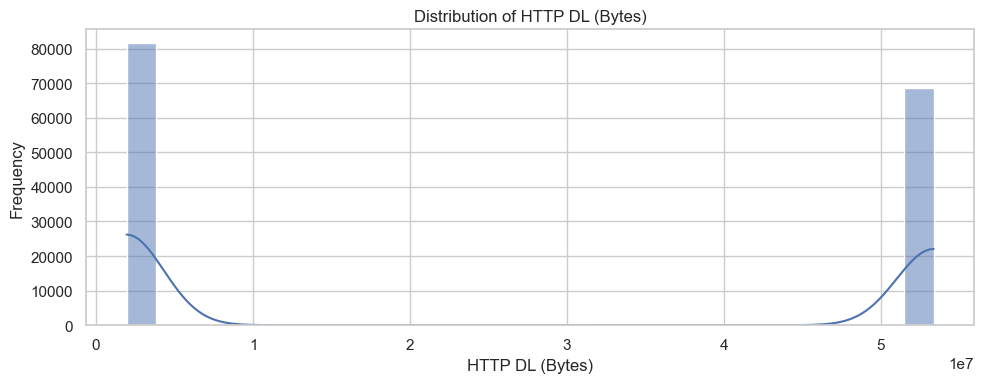

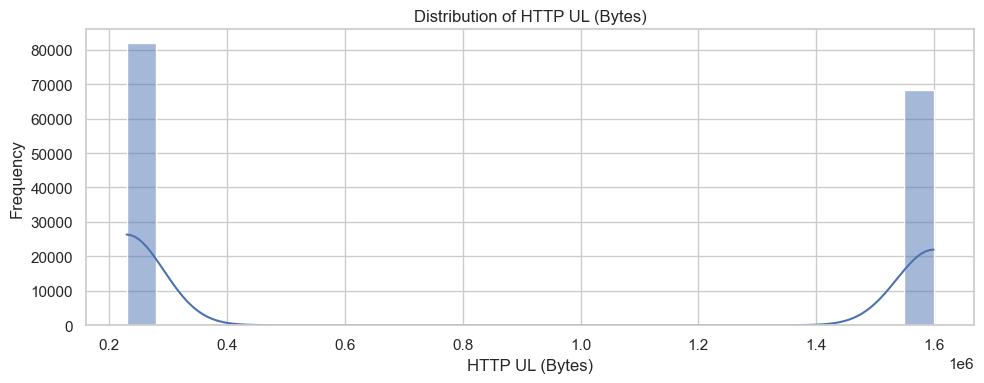

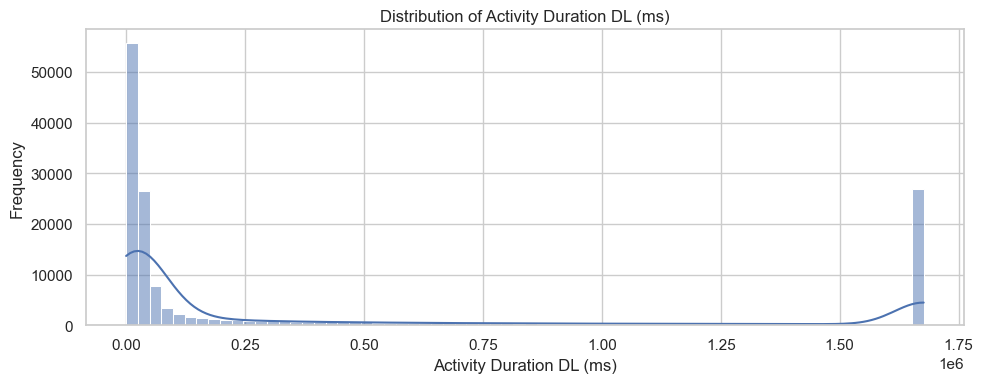

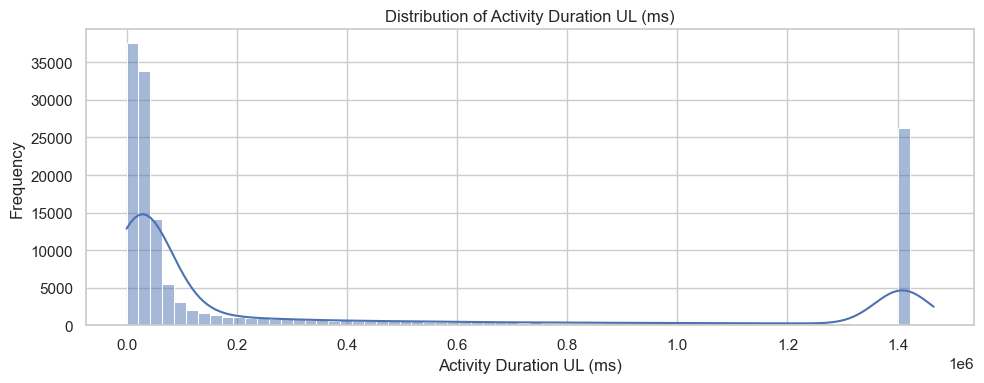

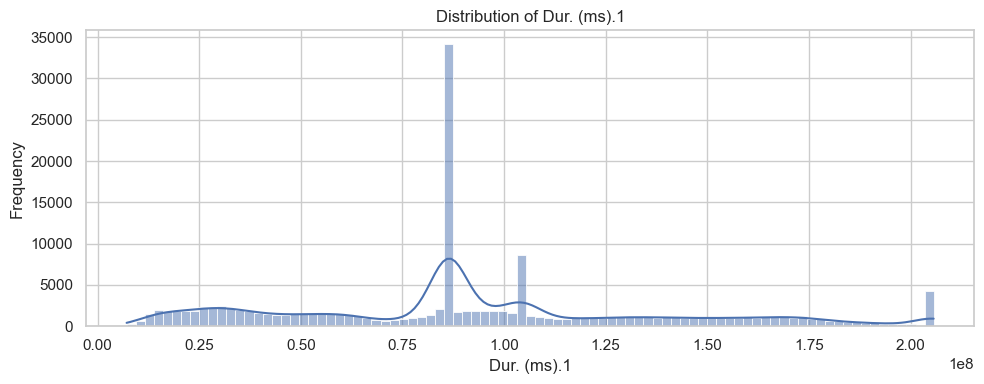

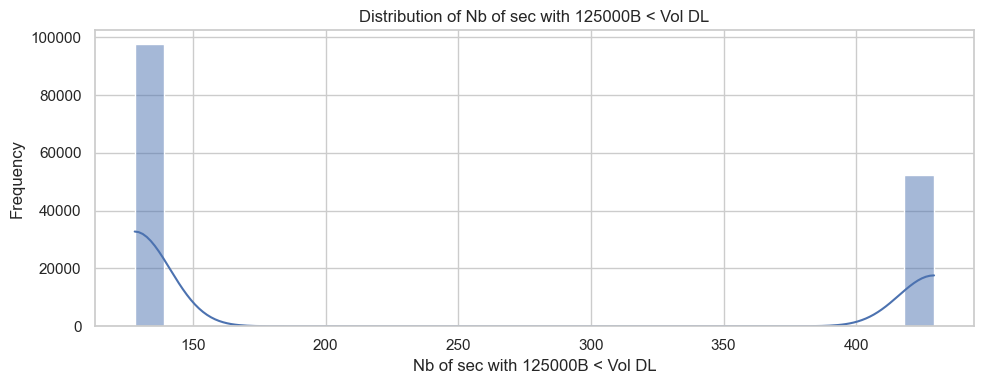

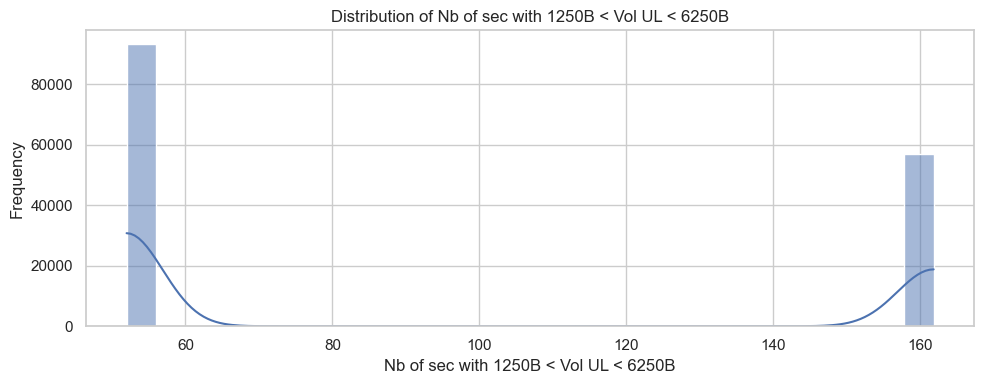

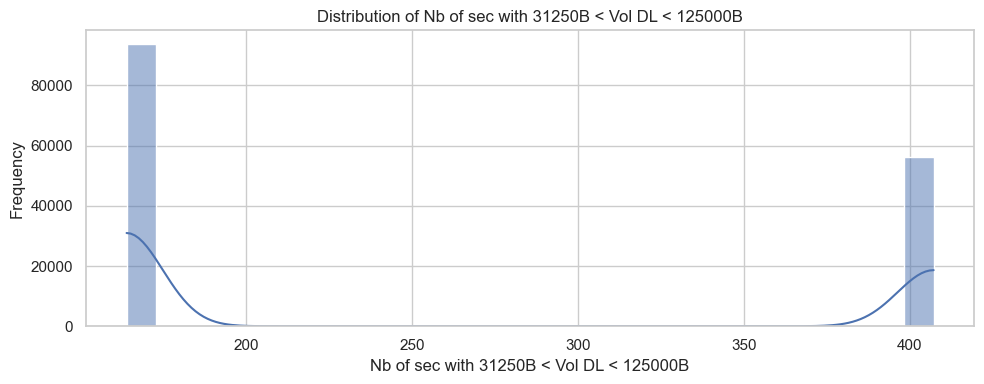

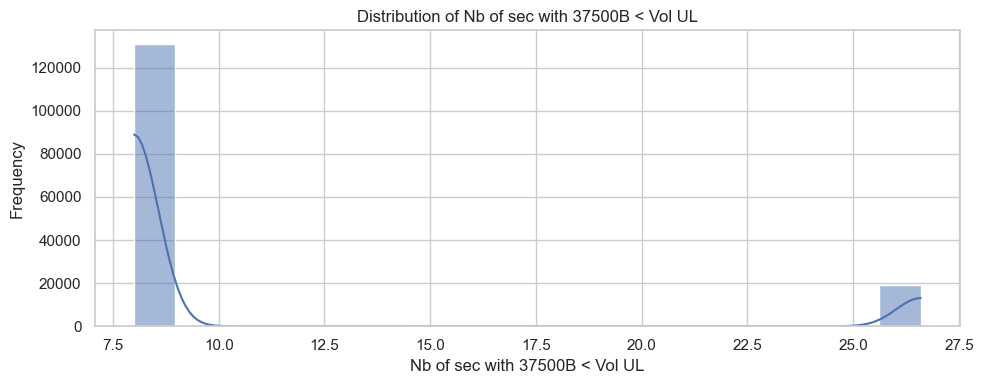

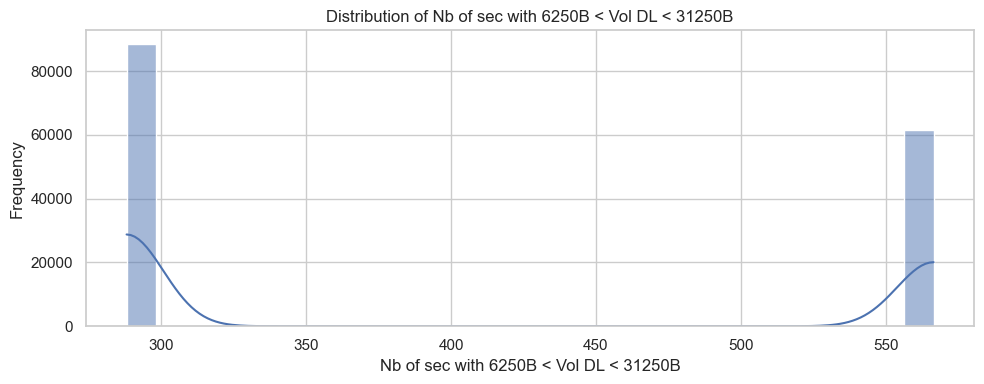

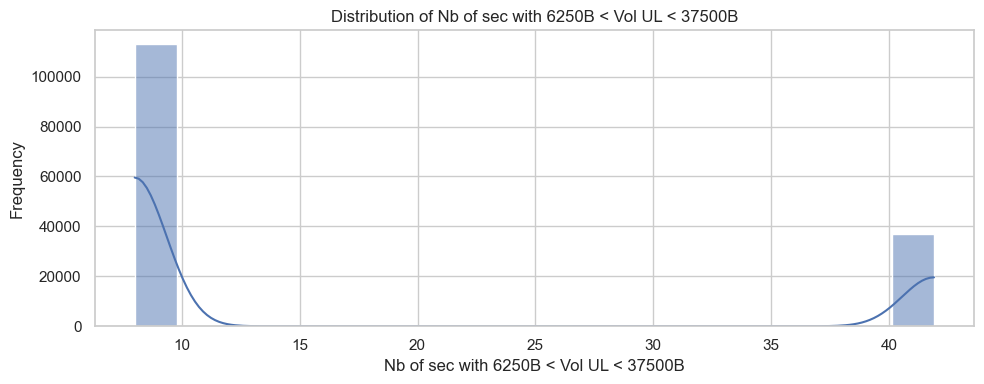

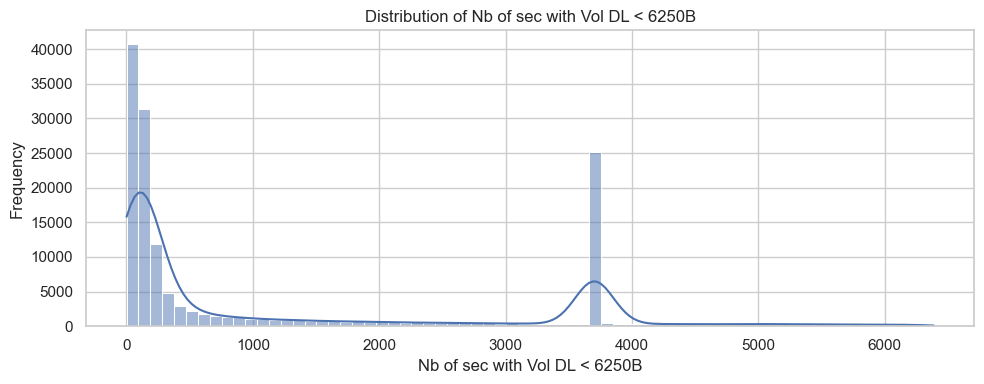

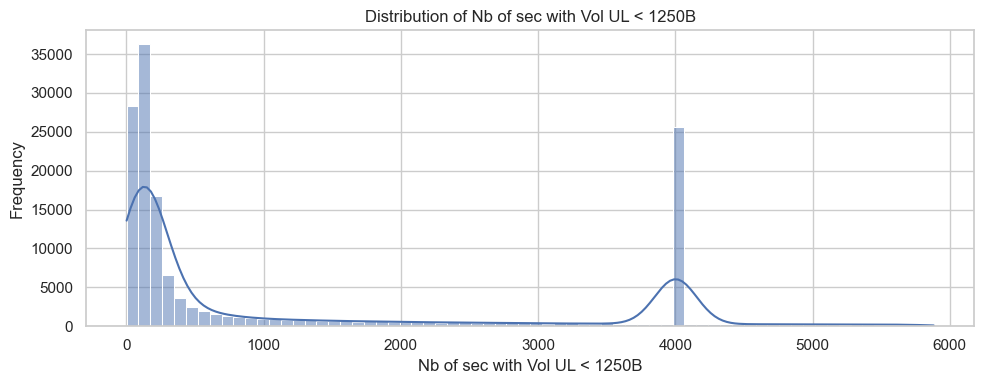

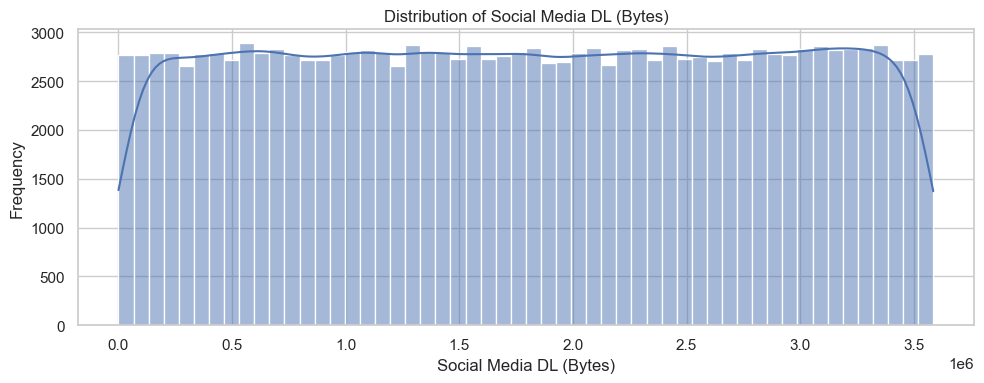

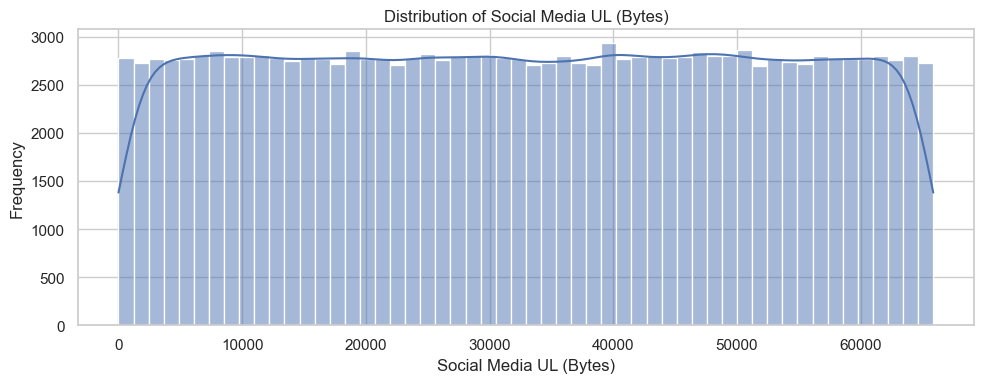

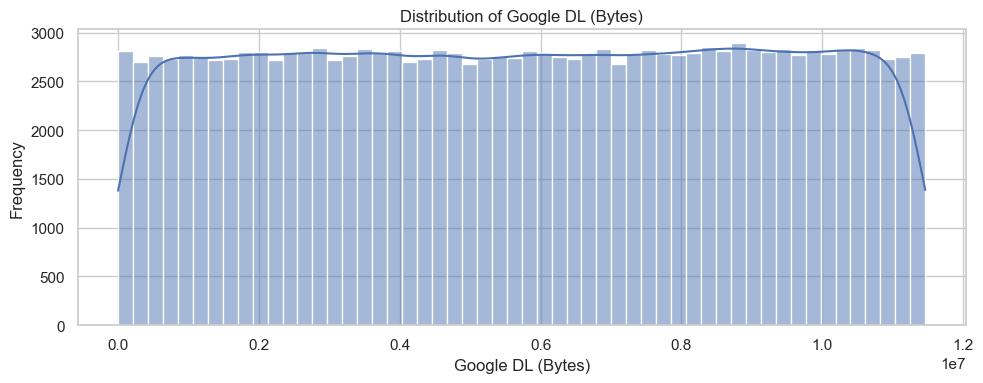

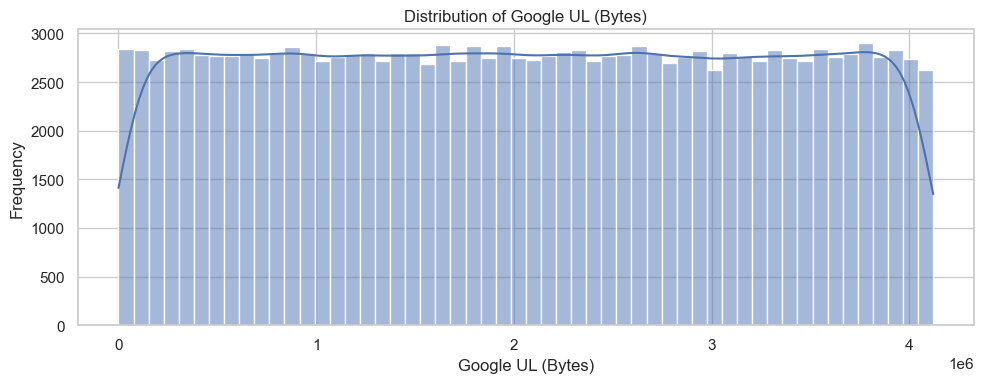

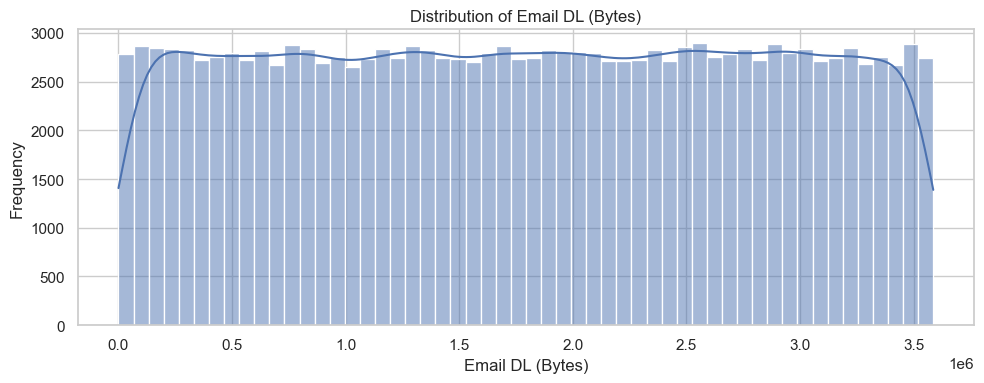

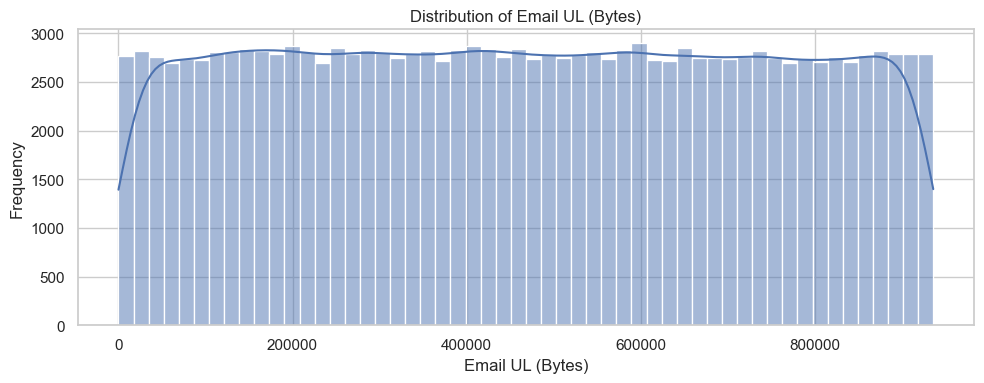

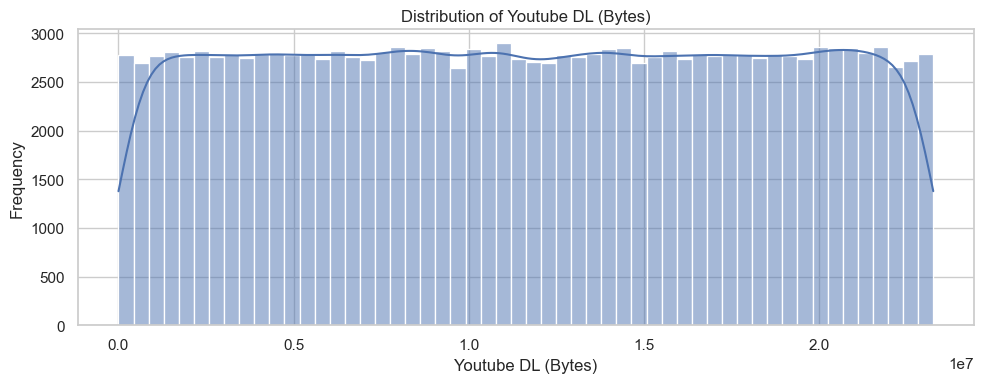

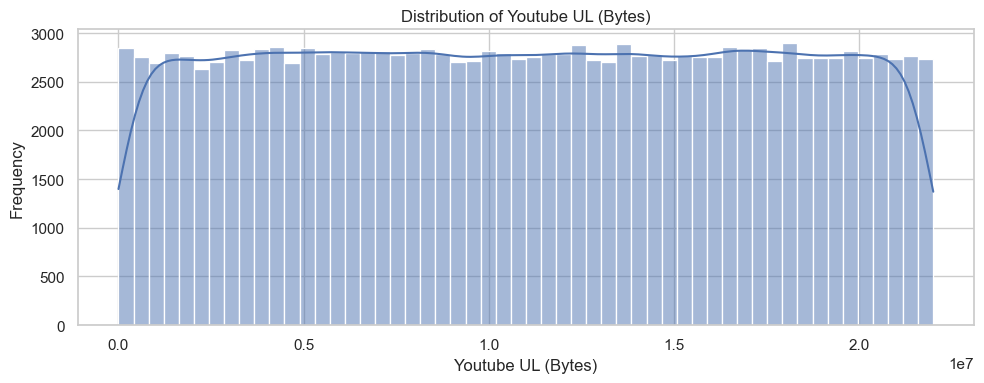

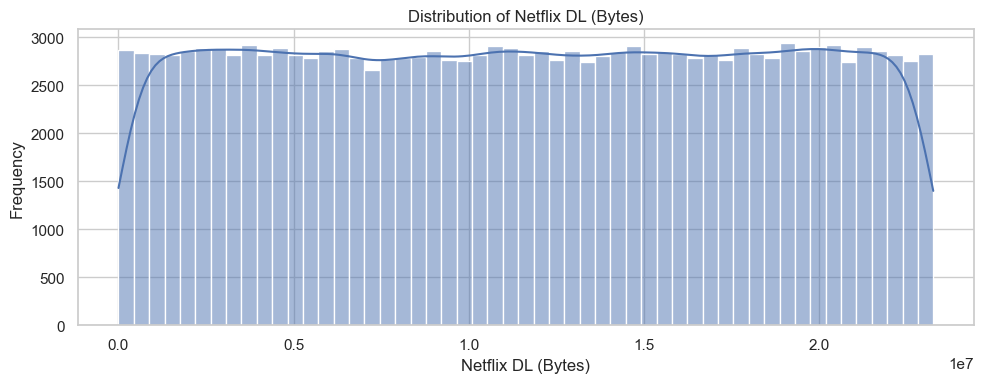

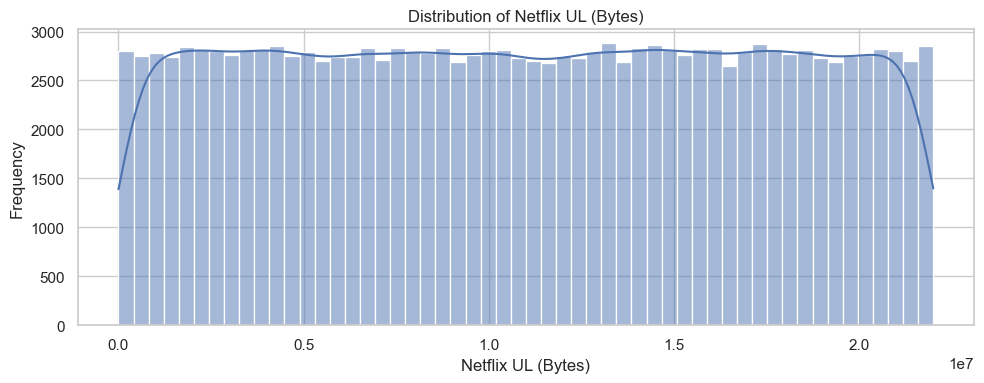

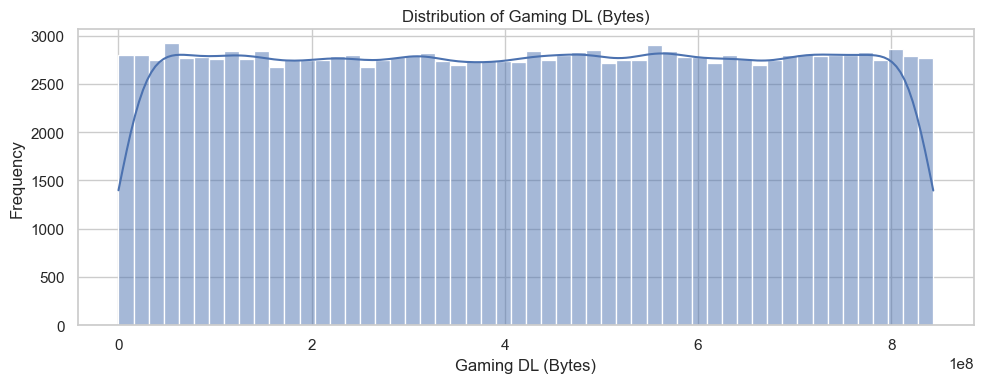

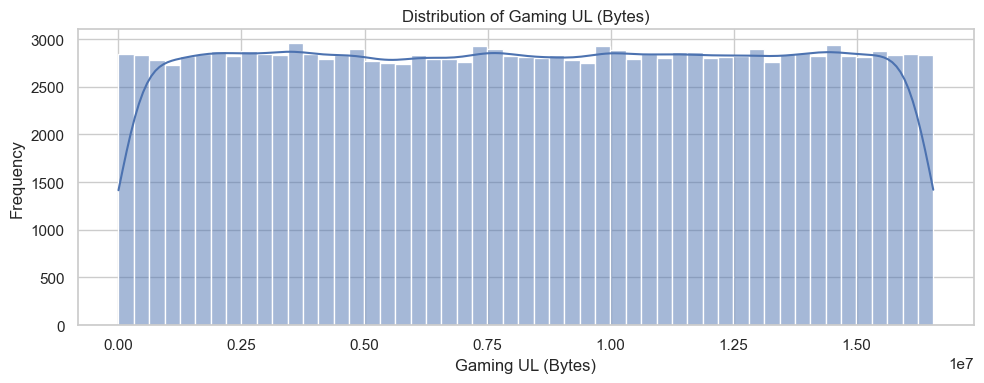

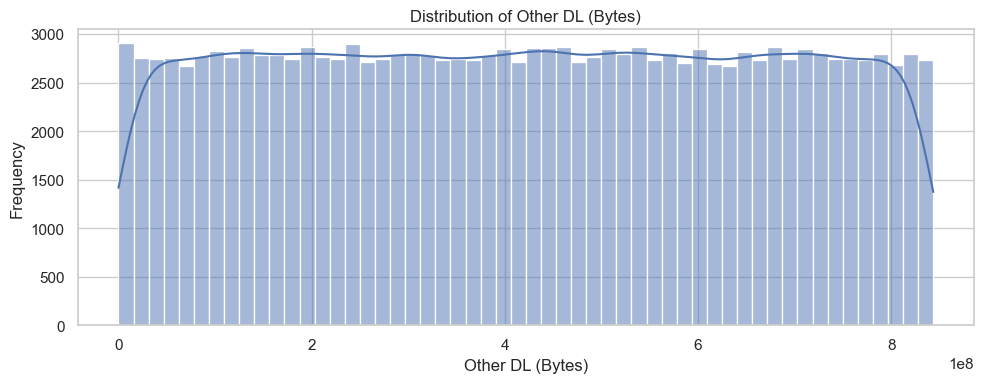

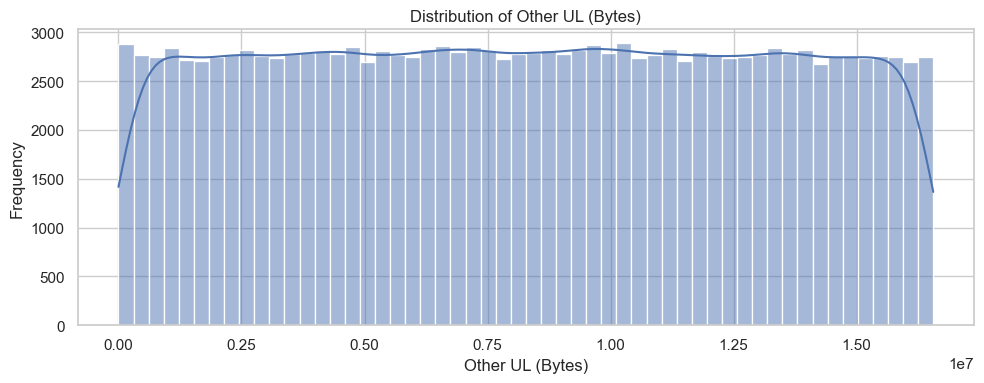

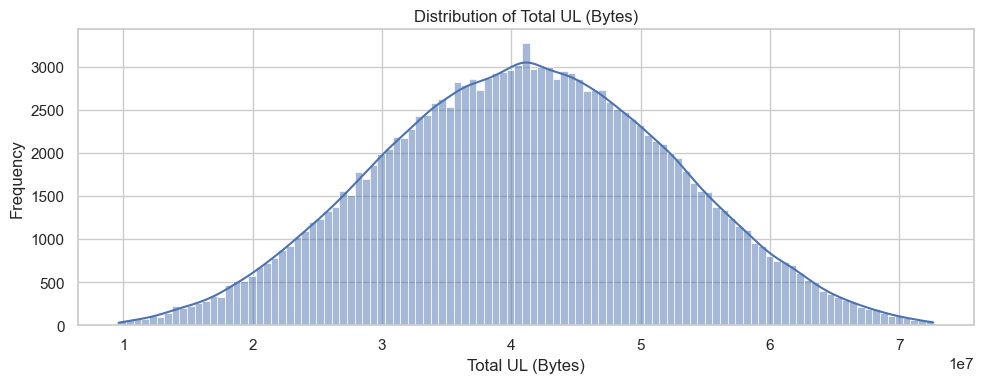

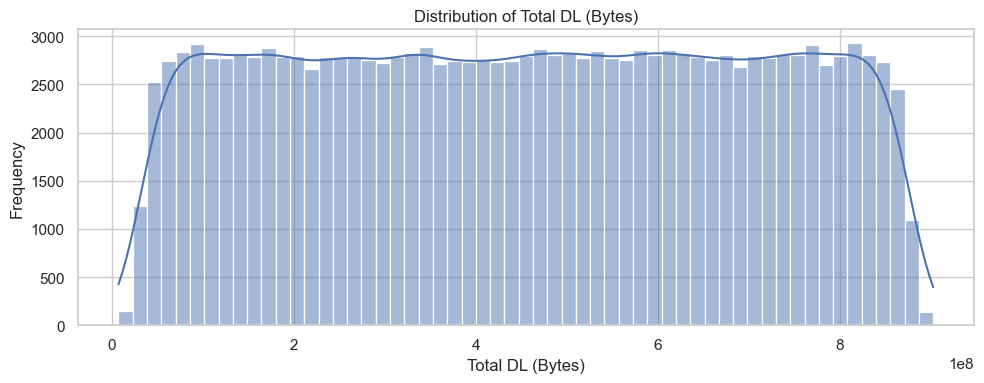

In [34]:
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

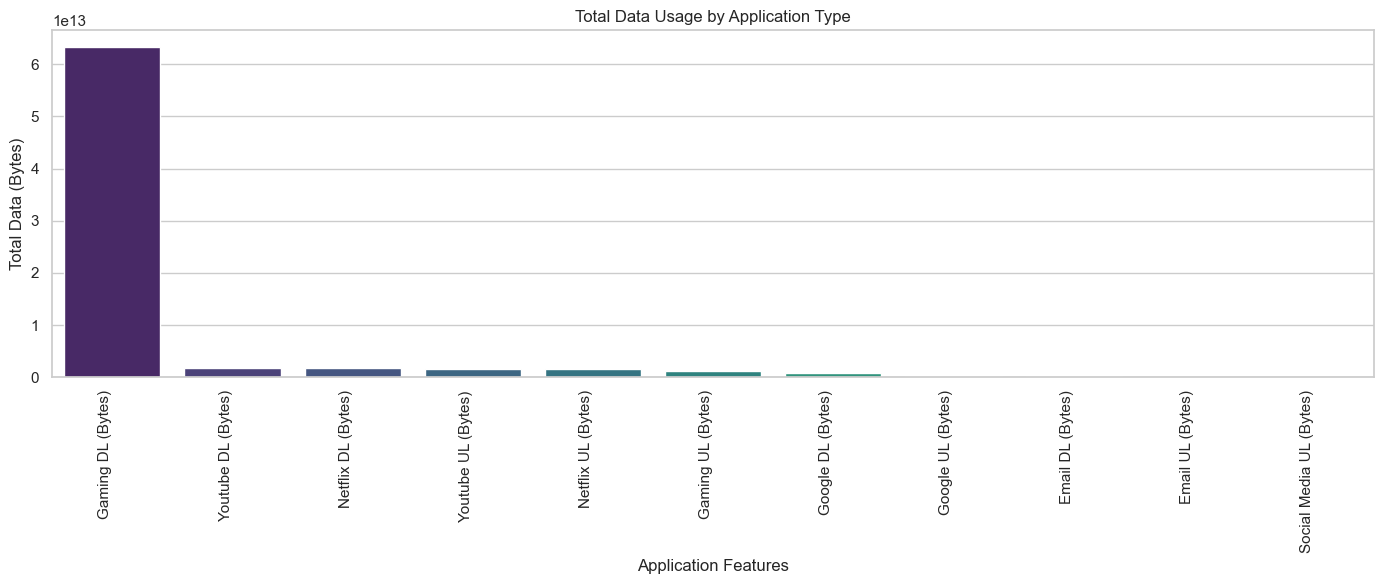

In [35]:
# 6. BIVARIATE ANALYSIS: Application vs Total Data (DL+UL)
df['Total Data (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']# Total Data Usage
app_columns = ['Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)','Email DL (Bytes)',
               'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)','Netflix DL (Bytes)', 
               'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)']
app_usage = df[app_columns].sum().sort_values(ascending=False) # Sum total data used per application column
plt.figure(figsize=(14, 6))
sns.barplot(x=app_usage.index, y=app_usage.values, palette='viridis')
plt.xticks(rotation=90, ha='right')
plt.title("Total Data Usage by Application Type")
plt.ylabel("Total Data (Bytes)")
plt.xlabel("Application Features")
plt.tight_layout()
plt.show()

### Key Insight:

#### **Gaming Downloads (Gaming DL) dominate total data usage by a huge margin compared to all other application types. It exceeds 6 × 10¹³ bytes, which is significantly higher than any other category.**
#### **Other categories like YouTube, Netflix, Google, Email, and Social Media (both download and upload) have relatively minimal data usage, with none coming close to the volume of Gaming DL.**
#### **This indicates that gaming-related content (particularly downloads) is the primary driver of data consumption among users.**

### This could be important for:

#### **Network optimization (prioritizing resources for gaming traffic)**
#### **Marketing focus (targeting gamers)**
#### **Service package designs (gaming data bundles).**

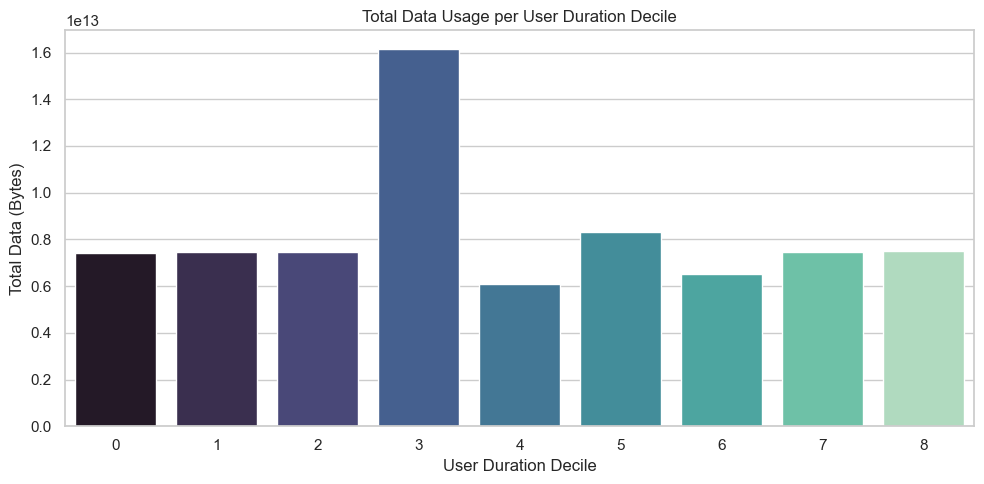

In [37]:
# 7. VARIABLE TRANSFORMATIONS – Decile Segmentation
df['Total Duration'] = df['Dur. (ms)']
# Use qcut with duplicates='drop' to handle duplicate bin edges
df['Decile'] = pd.qcut(df['Total Duration'], q=10, labels=False, duplicates='drop')
decile_data = df.groupby('Decile')['Total Data (Bytes)'].sum().reset_index() # Group and sum total data per decile
plt.figure(figsize=(10, 5))
sns.barplot(data=decile_data, x='Decile', y='Total Data (Bytes)', palette="mako")
plt.title("Total Data Usage per User Duration Decile")
plt.xlabel("User Duration Decile")
plt.ylabel("Total Data (Bytes)")
plt.tight_layout()
plt.show()

## Key Insight:

#### **Decile 3 shows significantly higher total data usage than all other user duration deciles, with usage surpassing 1.6 × 10¹³ bytes, nearly double that of any other group.**
#### **The remaining deciles (0, 1, 2, 4–8) have relatively similar and much lower usage, all under 1 × 10¹³ bytes.**
#### **This suggests that users in duration decile 3 are either exceptionally high data consumers or represent a segment with very heavy data-intensive usage patterns, regardless of their duration rank.**

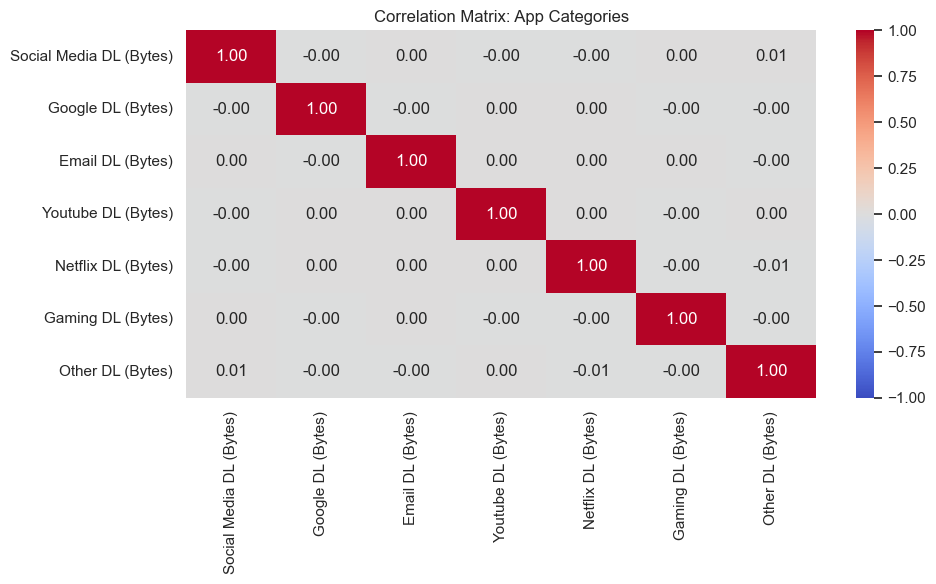

In [39]:
app_columns = ['Social Media DL (Bytes)','Google DL (Bytes)','Email DL (Bytes)',
               'Youtube DL (Bytes)','Netflix DL (Bytes)','Gaming DL (Bytes)','Other DL (Bytes)']
correlation_matrix = df[app_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix: App Categories")
plt.tight_layout()
plt.show()

## Key Insight:

#### **There is no strong positive or negative correlation between any of the app categories. Most values are very close to 0, indicating that usage in one app category is largely independent of others.**
#### **The diagonal shows perfect correlation (1.00) because each app category is, of course, perfectly correlated with itself.**
#### **Minor variations like -0.01 or 0.01 are statistically negligible and suggest no meaningful relationship.**

In [41]:
# 1. Select relevant numerical features
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# 2. Handle missing values by replacing them with the mean
df_numeric.fillna(df_numeric.mean(), inplace=True)

# 3. Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# 4. Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components
principal_components = pca.fit_transform(df_scaled)

# 5. Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.33801428 0.06789841]


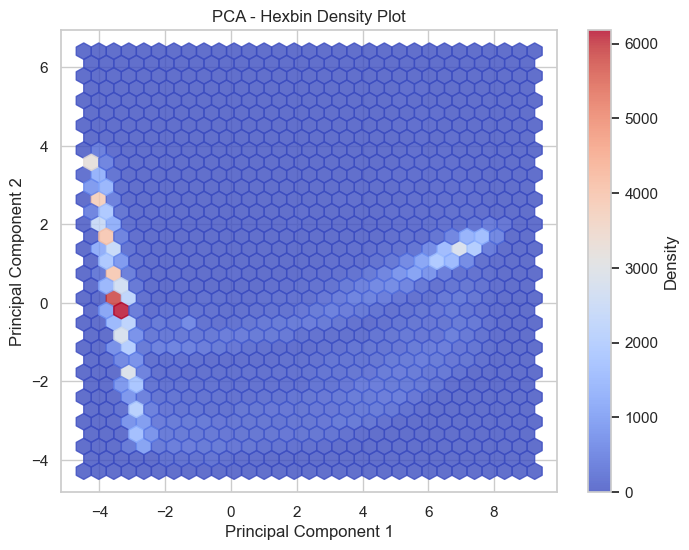

In [42]:
####Visualize the PCA Results
plt.figure(figsize=(8,6))
plt.hexbin(pca_df['PC1'], pca_df['PC2'], gridsize=30, cmap='coolwarm', alpha=0.8)
plt.colorbar(label="Density")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Hexbin Density Plot')
plt.show()
##Explained Variance Ratio: Indicates how much of the dataset’s variance is captured by the principal components.

##Visualization: Helps identify patterns or clusters in the data.

## Key Insight:

#### **Two distinct dense clusters are visible:**
###### **One cluster is centered around (-4, 1).**
###### **Another cluster is around (6, 1).**
###### **These clusters represent groups of users who share similar behavior or patterns in the original high-dimensional data.**
###### **High-density regions (indicated in red and white) show where most users are concentrated, while blue areas indicate lower density.**

## Task2

In [45]:
df['Total Traffic (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

user_engagement = df.groupby('MSISDN/Number').agg(
    session_frequency=('Bearer Id', 'count'),                  # Number of sessions
    total_session_duration=('Dur. (ms)', 'sum'),               # Total session duration
    total_session_traffic=('Total Traffic (Bytes)', 'sum')    # Total data usage (DL + UL)
    

).reset_index()

print(user_engagement.head())

   MSISDN/Number  session_frequency  total_session_duration  \
0   3.361671e+10               8428            7.808209e+08   
1   3.361671e+10                  1            1.652190e+05   
2   3.361672e+10                  1            1.674700e+04   
3   3.361672e+10                  1            2.056795e+05   
4   3.361672e+10                  2            2.797900e+04   

   total_session_traffic  
0           4.178117e+12  
1           6.903629e+08  
2           7.258701e+08  
3           5.071914e+07  
4           8.891305e+08  


## Task 2.1

In [47]:
df['Total Traffic (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

user_engagement = df.groupby('MSISDN/Number').agg(
    session_frequency=('Bearer Id', 'count'),
    total_session_duration=('Dur. (ms)', 'sum'),
    total_session_traffic=('Total Traffic (Bytes)', 'sum')
).reset_index()

top_10_frequency = user_engagement.nlargest(10, 'session_frequency')
top_10_duration = user_engagement.nlargest(10, 'total_session_duration')
top_10_traffic = user_engagement.nlargest(10, 'total_session_traffic')

df = df.merge(user_engagement, on='MSISDN/Number', how='left')

# Display the results
print(" Top 10 Customers by Session Frequency:\n", top_10_frequency)
print("\n Top 10 Customers by Total Duration:\n", top_10_duration)
print("\n Top 10 Customers by Total Traffic:\n", top_10_traffic)


 Top 10 Customers by Session Frequency:
        MSISDN/Number  session_frequency  total_session_duration  \
82717   3.372683e+10              24948            2.331628e+09   
0       3.361671e+10               8428            7.808209e+08   
46060   3.366371e+10               1067            6.457813e+07   
5942    3.362632e+10                 18            2.040351e+06   
5596    3.362578e+10                 17            1.879415e+06   
29468   3.365973e+10                 16            2.044064e+06   
68779   3.367588e+10                 15            1.926470e+06   
57534   3.366716e+10                 13            1.428216e+06   
6410    3.362708e+10                 12            1.377434e+06   
27852   3.365936e+10                 11            1.732911e+06   

       total_session_traffic  
82717           1.230277e+13  
0               4.178117e+12  
46060           5.319969e+11  
5942            7.971167e+09  
5596            8.499621e+09  
29468           7.705863e+09  
6877

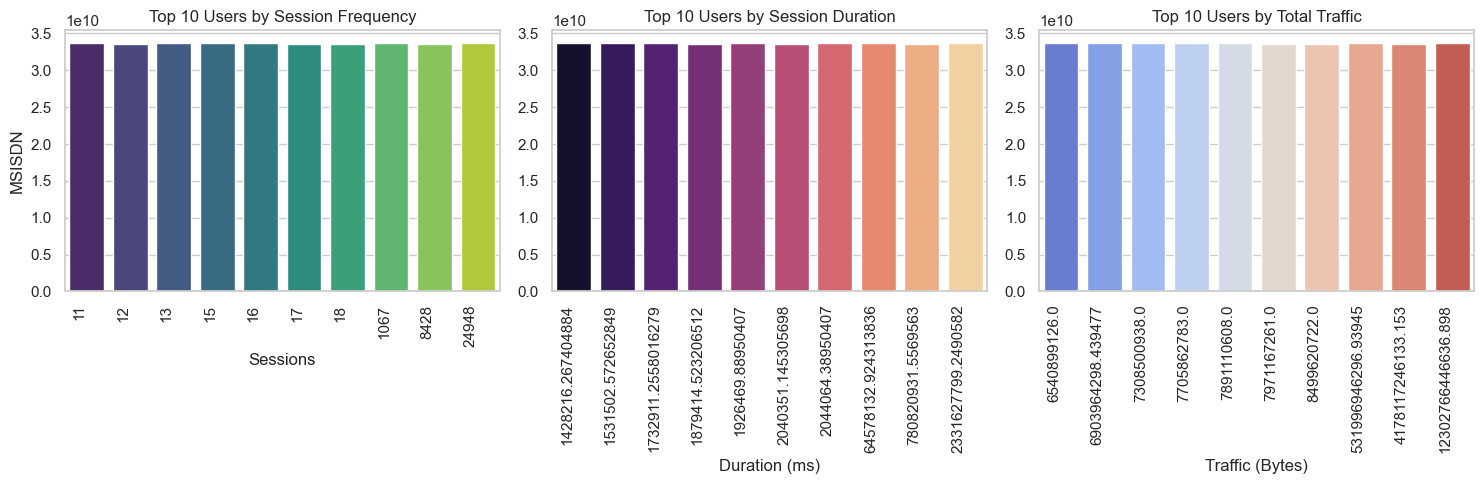

In [48]:
plt.figure(figsize=(15, 5))

# Plot 1: Session Frequency
plt.subplot(1, 3, 1)
sns.barplot(data=top_10_frequency, y='MSISDN/Number', x='session_frequency', palette='viridis')
plt.xticks(rotation=90, ha='right')
plt.title("Top 10 Users by Session Frequency")
plt.xlabel("Sessions")
plt.ylabel("MSISDN")

# Plot 2: Total Duration
plt.subplot(1, 3, 2)
sns.barplot(data=top_10_duration, y='MSISDN/Number', x='total_session_duration', palette='magma')
plt.xticks(rotation=90, ha='right')
plt.title("Top 10 Users by Session Duration")
plt.xlabel("Duration (ms)")
plt.ylabel("")

# Plot 3: Total Traffic
plt.subplot(1, 3, 3)
sns.barplot(data=top_10_traffic, y='MSISDN/Number', x='total_session_traffic', palette='coolwarm')
plt.xticks(rotation=90, ha='right')
plt.title("Top 10 Users by Total Traffic")
plt.xlabel("Traffic (Bytes)")
plt.ylabel("")

plt.tight_layout()
plt.show()

## Key Insights:

### Top Users by Session Frequency (left chart):
#### **The most active users (e.g., user 11, 12, 13...) have the highest number of sessions.**
#### **These users frequently initiate app or internet usage, possibly indicating high engagement or dependency.**

### Top Users by Session Duration (middle chart):
#### **Users like 1428218... and 535152... spend the most time per session.**
#### **These users may be engaged in long-form content (e.g., streaming, gaming, video calls).**

### Top Users by Total Traffic (right chart):
#### **Users like 6540899..., 6890594..., and 7708059... consume the most data.**
#### **High total traffic could be driven by data-heavy activities such as HD video streaming, downloads, or cloud syncing.**

###  Business Implication:
#### **These high-usage users can be considered power users and might benefit from premium plans or targeted retention strategies.**
#### **A deeper dive into their app usage patterns could inform service optimization or personalized marketing.**

In [50]:
# Group by MSISDN (Customer ID)
engagement_per_user = df.groupby('MSISDN/Number').agg({
    'session_frequency': 'sum',
    'total_session_duration': 'sum',
    'total_session_traffic': 'count'  # proxy for session frequency
}).rename(columns={
    'total_session_duration': 'Total Session Duration (min)',
    'total_session_traffic': 'Total Traffic (MB)',
    'session_frequency': 'Session Frequency'
}).reset_index()

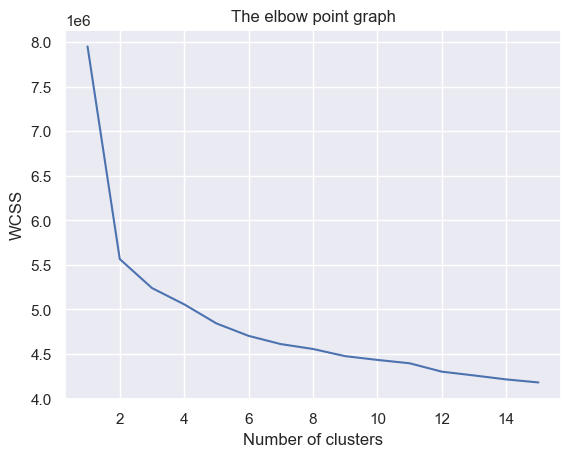

In [51]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

sns.set()
plt.plot(range(1,16),wcss)
plt.title("The elbow point graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

## The elbow point in the graph is the point where the WCSS starts to decrease slowly.

## This point represents the optimal number of clusters k.

## Let's say the elbow appears at k=3 — this means 3 clusters is optimal for grouping users based on engagement behavior.

## Interpret Your Findings

### **Cluster 0 – High Engagement Users**
#### **Users with high session count, long durations, and large data usage. Likely heavy streamers, gamers, or business users.**

### **Cluster 1 – Moderate Engagement Users**
#### **Medium use across metrics. Could represent typical consumers using apps moderately.**

### **Cluster 2 – Low Engagement Users**
#### **Minimal session counts, low durations, and low traffic. Possibly inactive users or low data subscribers.**

In [54]:
pip install pandas seaborn matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [55]:
df['Total Traffic (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

# Aggregate Engagement Metrics
engagement_df = df.groupby('MSISDN/Number').agg(
    session_frequency=('Bearer Id', 'count'),
    total_session_duration=('Dur. (ms)', 'sum'),
    total_session_traffic=('Total Traffic (Bytes)', 'sum')
).reset_index()

# Scale features
scaler = MinMaxScaler()
engagement_scaled = scaler.fit_transform(engagement_df[['session_frequency', 'total_session_duration', 'total_session_traffic']])

# Apply KMeans Clustering
kmeans_engagement = KMeans(n_clusters=3, random_state=42)
engagement_df['Engagement Cluster'] = kmeans_engagement.fit_predict(engagement_scaled)

# Add Engagement Score as average of the 3 metrics
engagement_df['Engagement Score'] = engagement_scaled.mean(axis=1)

# Merge into original df
df = pd.merge(df, engagement_df[['MSISDN/Number', 'Engagement Cluster', 'Engagement Score']], on='MSISDN/Number', how='left')

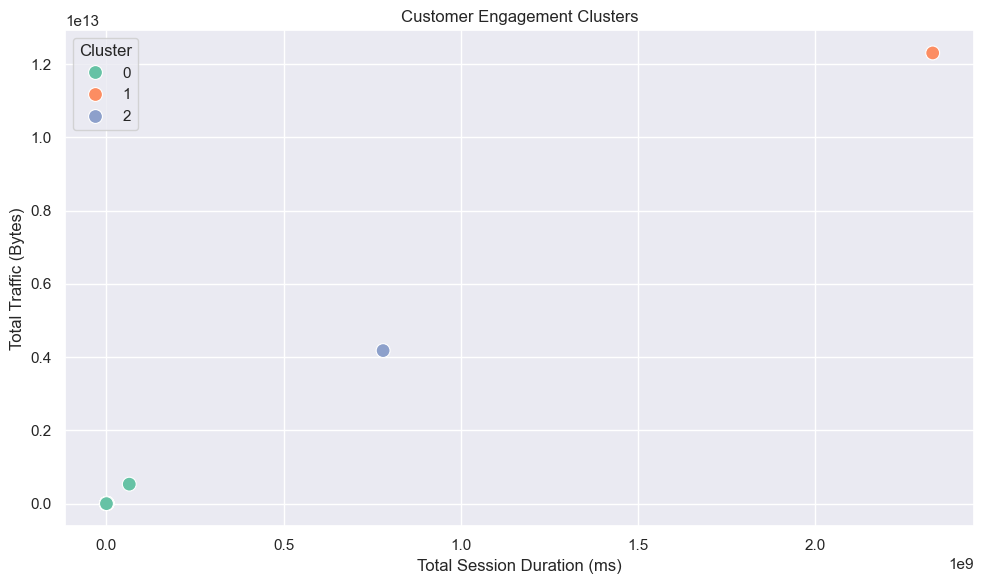

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='total_session_duration', 
    y='total_session_traffic', 
    hue='Engagement Cluster', 
    data=engagement_df,     
    palette='Set2',
    s=100)

plt.title('Customer Engagement Clusters')
plt.xlabel('Total Session Duration (ms)')
plt.ylabel('Total Traffic (Bytes)')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

## Key Insight:

### Three distinct customer segments (Clusters 0, 1, 2) are visible:

#### Cluster 1 (Orange, top right):
##### **Highest traffic and longest session duration.**
##### **Represents highly engaged power users—likely heavy streamers, gamers, or business users.**

#### Cluster 0 (Green, bottom left):
##### **Low traffic and short session duration.**
##### **Represents low-engagement users—likely casual or infrequent users.**

#### Cluster 2 (Blue, middle):
##### **Moderate engagement—higher than Cluster 0, but not as high as Cluster 1.**
##### **Could be regular users who use data for moderate tasks.**

## Business Implication:
##### **Cluster 1 users might be ideal for premium plans, loyalty rewards, or upselling.**
##### **Cluster 0 users may need re-engagement strategies or surveys to understand low usage.**
##### **Cluster 2 users can be targeted to upgrade to higher tiers through personalized offers.**

        session_frequency                              total_session_duration  \
                      min    max          mean     sum                    min   
Cluster                                                                         
0                       1   1067      1.409945  116625           7.146000e+03   
1                   24948  24948  24948.000000   24948           2.331628e+09   
2                    8428   8428   8428.000000    8428           7.808209e+08   

                                                  total_session_traffic  \
                  max          mean           sum                   min   
Cluster                                                                   
0        6.457813e+07  1.298068e+05  1.073710e+10          3.324901e+07   
1        2.331628e+09  2.331628e+09  2.331628e+09          1.230277e+13   
2        7.808209e+08  7.808209e+08  7.808209e+08          4.178117e+12   

                                                   
          

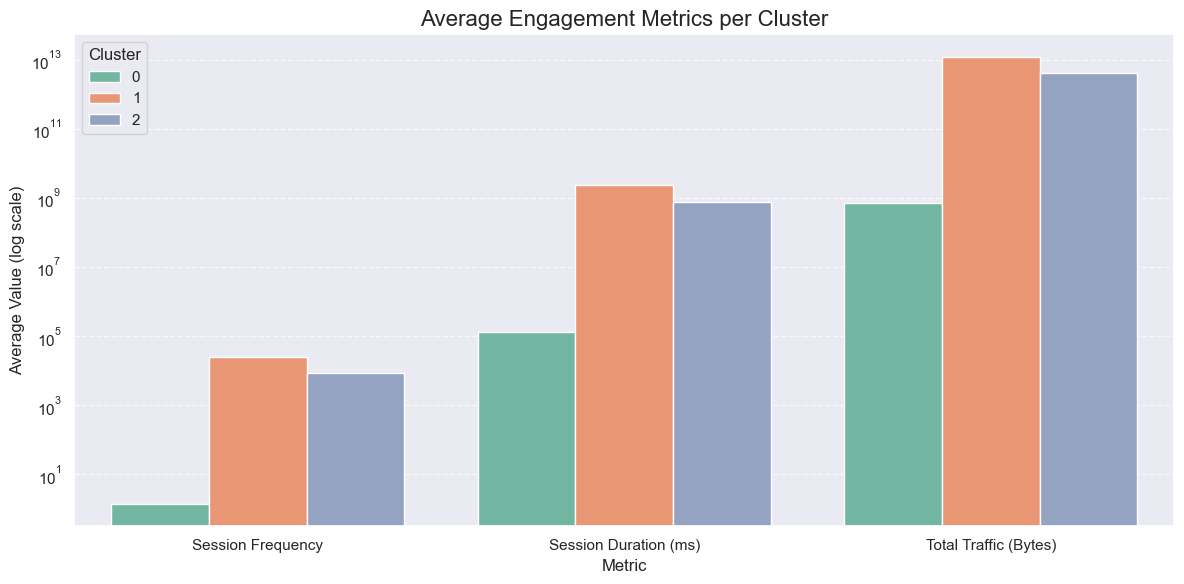

In [58]:
user_engagement_clustered = engagement_df.copy()
user_engagement_clustered['Cluster'] = user_engagement_clustered['Engagement Cluster']  # Note the column name

summary_stats = user_engagement_clustered.groupby('Cluster').agg({
    'session_frequency': ['min', 'max', 'mean', 'sum'],
    'total_session_duration': ['min', 'max', 'mean', 'sum'],
    'total_session_traffic': ['min', 'max', 'mean', 'sum']})
print(summary_stats)

# Bar plot section
cluster_means = user_engagement_clustered.groupby('Cluster')[[
    'session_frequency', 'total_session_duration', 'total_session_traffic']].mean().reset_index()

cluster_means.rename(columns={
    'session_frequency': 'Session Frequency',
    'total_session_duration': 'Session Duration (ms)',
    'total_session_traffic': 'Total Traffic (Bytes)'}, inplace=True)

cluster_means_melted = cluster_means.melt(id_vars='Cluster', var_name='Metric', value_name='Average')

plt.figure(figsize=(12, 6))
sns.barplot(data=cluster_means_melted, x='Metric', y='Average', hue='Cluster', palette='Set2')
plt.title('Average Engagement Metrics per Cluster', fontsize=16)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Average Value (log scale)', fontsize=12)
plt.yscale('log')  # Because Bytes and Duration values are very large
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Cluster', title_fontsize=12)
plt.tight_layout()
plt.show()


## Cluster Breakdown:

### Cluster 1 (Orange) – High Engagement Users:
##### **Highest values across all three metrics.**
##### **These users connect frequently, stay online longer, and consume the most data.**
##### **Likely power users—ideal for premium plans or targeted offers.**

### Cluster 2 (Blue) – Moderate Engagement Users:

##### **Mid-level session duration and data usage.**
##### **Lower session frequency than Cluster 1.**
##### **These could be consistent users who might be nudged toward more usage.**

### Cluster 0 (Green) – Low Engagement Users:
##### **Lowest session frequency, duration, and data consumption.**
##### **Likely inactive or light users, possibly at risk of churn.**
##### **May need re-engagement strategies or support.**

## Business Implication:
#### **Cluster 1: Target for upselling, loyalty programs, or high-speed plans.**
#### **Cluster 2: Nurture with incentives or moderate-tier plans.**
#### **Cluster 0: Investigate reasons for low usage (e.g., technical issues, dissatisfaction) and consider retention strategies.**

In [60]:
df['social_media_traffic'] = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
df['google_traffic'] = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
df['email_traffic'] = df['Email DL (Bytes)'] + df['Email UL (Bytes)']
df['youtube_traffic'] = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']
df['netflix_traffic'] = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']
df['gaming_traffic'] = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']
df['other_traffic'] = df['Other DL (Bytes)'] + df['Other UL (Bytes)']


user_application_traffic = df.groupby('MSISDN/Number').agg({
    'social_media_traffic': 'sum',
    'google_traffic': 'sum',
    'email_traffic': 'sum',
    'youtube_traffic': 'sum',
    'netflix_traffic': 'sum',
    'gaming_traffic': 'sum',
    'other_traffic': 'sum'
}).reset_index()


print("Top 10 Users - Social Media:")
print(user_application_traffic.nlargest(10, 'social_media_traffic')[['MSISDN/Number', 'social_media_traffic']])

print("\nTop 10 Users - Google:")
print(user_application_traffic.nlargest(10, 'google_traffic')[['MSISDN/Number', 'google_traffic']])

print("\nTop 10 Users - Email:")
print(user_application_traffic.nlargest(10, 'email_traffic')[['MSISDN/Number', 'email_traffic']])

print("\nTop 10 Users - YouTube:")
print(user_application_traffic.nlargest(10, 'youtube_traffic')[['MSISDN/Number', 'youtube_traffic']])

print("\nTop 10 Users - Netflix:")
print(user_application_traffic.nlargest(10, 'netflix_traffic')[['MSISDN/Number', 'netflix_traffic']])

print("\nTop 10 Users - Gaming:")
print(user_application_traffic.nlargest(10, 'gaming_traffic')[['MSISDN/Number', 'gaming_traffic']])

print("\nTop 10 Users - Other Apps:")
print(user_application_traffic.nlargest(10, 'other_traffic')[['MSISDN/Number', 'other_traffic']])

Top 10 Users - Social Media:
       MSISDN/Number  social_media_traffic
82717   3.372683e+10          4.568081e+10
0       3.361671e+10          1.545846e+10
46060   3.366371e+10          1.974199e+09
5942    3.362632e+10          4.337478e+07
29468   3.365973e+10          3.541236e+07
5596    3.362578e+10          2.713550e+07
57534   3.366716e+10          2.424785e+07
63376   3.366907e+10          2.380083e+07
23747   3.365849e+10          2.300007e+07
52754   3.366553e+10          2.258603e+07

Top 10 Users - Google:
       MSISDN/Number  google_traffic
82717   3.372683e+10    1.949231e+11
0       3.361671e+10    6.627969e+10
46060   3.366371e+10    8.250702e+09
5942    3.362632e+10    1.521919e+08
5596    3.362578e+10    1.423079e+08
29468   3.365973e+10    1.165163e+08
68779   3.367588e+10    1.098605e+08
57534   3.366716e+10    1.050327e+08
78729   3.369876e+10    9.193515e+07
27852   3.365936e+10    9.104102e+07

Top 10 Users - Email:
       MSISDN/Number  email_traffic
82717   

In [61]:
df['social_media_traffic'] = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
df['youtube_traffic'] = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']
df['google_traffic'] = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
df['email_traffic'] = df['Email DL (Bytes)'] + df['Email UL (Bytes)']
df['netflix_traffic'] = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']
df['gaming_traffic'] = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']
df['other_traffic'] = df['Other DL (Bytes)'] + df['Other UL (Bytes)']

# Total traffic per application
app_traffic = {
    'Social Media': df['social_media_traffic'].sum(),
    'YouTube': df['youtube_traffic'].sum(),
    'Google': df['google_traffic'].sum(),
    'Email': df['email_traffic'].sum(),
    'Netflix': df['netflix_traffic'].sum(),
    'Gaming': df['gaming_traffic'].sum(),
    'Other': df['other_traffic'].sum()
}

# Convert to DataFrame and get top 3 apps
app_traffic_df = pd.DataFrame(list(app_traffic.items()), columns=['Application', 'Total Traffic'])
top_3_apps = app_traffic_df.sort_values(by='Total Traffic', ascending=False).head(3)

print(top_3_apps)

  Application  Total Traffic
5      Gaming   6.455040e+13
6       Other   6.440523e+13
1     YouTube   3.396545e+12


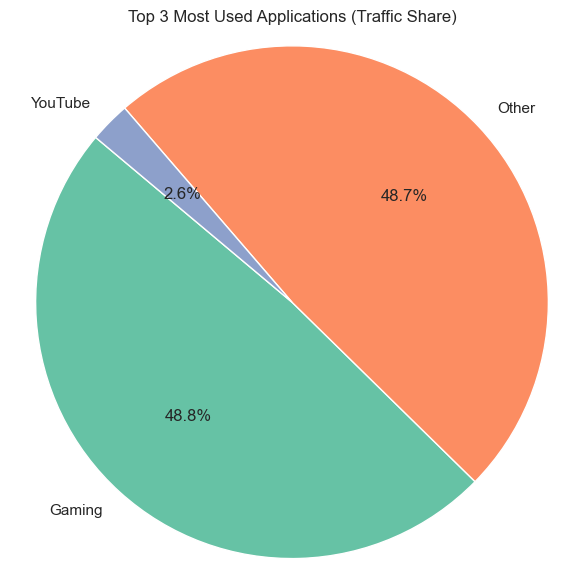

In [62]:
plt.figure(figsize=(6, 6))
plt.pie(top_3_apps['Total Traffic'], labels=top_3_apps['Application'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title("Top 3 Most Used Applications (Traffic Share)")
plt.axis('equal')  # Equal aspect ratio
plt.tight_layout()
plt.show()

In [63]:
df['Total Traffic (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

user_engagement = df.groupby("MSISDN/Number").agg(
    session_frequency=('Bearer Id', 'count'),
    total_session_duration=('Dur. (ms)', 'sum'),
    total_session_traffic=('Total Traffic (Bytes)', 'sum')
).reset_index()

scaler = MinMaxScaler()
engagement_scaled = scaler.fit_transform(user_engagement[['session_frequency', 'total_session_duration', 'total_session_traffic']])

engagement_df.rename(columns={'Bearer Id': 'session_frequency'}, inplace=True)


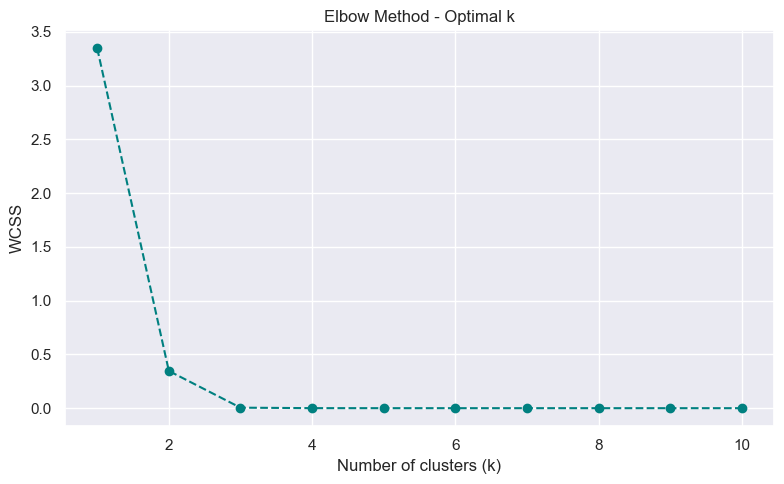

In [64]:
wcss = []  # Within-Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(engagement_scaled)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='teal')
plt.title("Elbow Method - Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.tight_layout()
plt.show()

## Key Insight:

#### **The graph plots WCSS (Within-Cluster Sum of Squares) on the y-axis versus the number of clusters (k) on the x-axis.**
#### **WCSS decreases as the number of clusters increases because points are grouped more precisely.**
#### **However, after a certain point, the rate of decrease slows significantly — this point is called the “elbow”.**

## Choosing the Best Value of k:
#### **The elbow point is where the curve starts to flatten, indicating that adding more clusters doesn’t significantly reduce WCSS.**
#### **In this case, the elbow is at k = 3, which suggests that 3 is the optimal number of clusters.**

In [66]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
user_engagement['engagement_cluster'] = kmeans.fit_predict(engagement_scaled)

In [67]:
# Step 5: Create 'user_engagement' score using sum of normalized metrics
user_engagement['user_engagement'] = engagement_scaled.sum(axis=1)

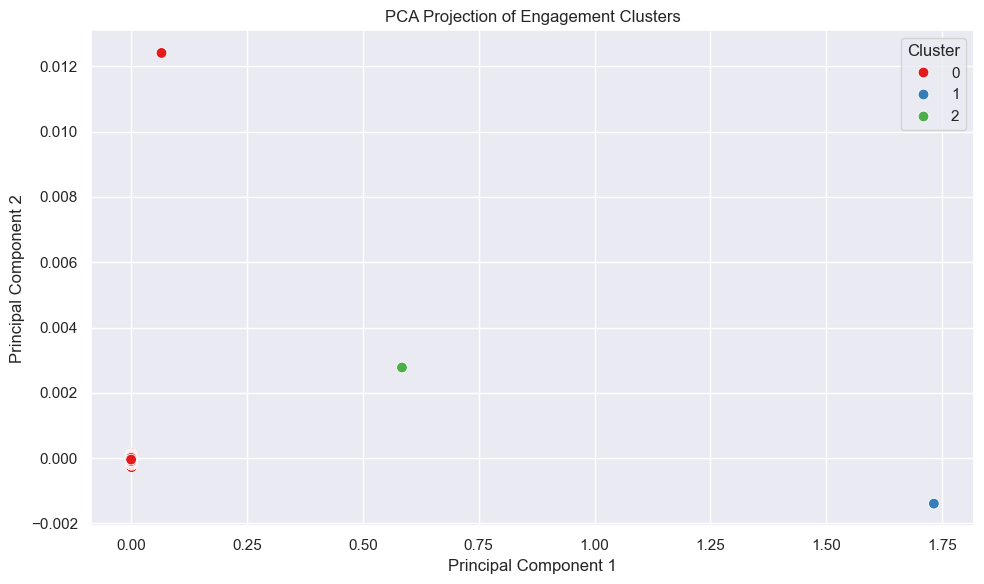

In [68]:
from sklearn.decomposition import PCA

# PCA to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(engagement_scaled)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = user_engagement['engagement_cluster']

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=60)
plt.title("PCA Projection of Engagement Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()


## This graph showcases a PCA (Principal Component Analysis) projection of engagement clusters divided into three groups (red, blue, and green). The 

### key insight here is:
#### **- Distinct Engagement Patterns: The clusters represent different levels of engagement:**
#### **- Cluster 0 (Red): Positioned near the origin, indicating low engagement variation.**
#### **- Cluster 1 (Blue): Spread along Principal Component 1, signifying higher engagement variation.**
#### **- Cluster 2 (Green): Moderately spread, suggesting average engagement variation.**





## Task3

## Task 3.1

In [72]:
# Step 1: Create total TCP retransmission column
df['Total TCP Retransmission'] = df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']

# Step 2: Fill missing values with the mean (optional but safe)
df['Total TCP Retransmission'] = df['Total TCP Retransmission'].fillna(df['Total TCP Retransmission'].mean())

# Step 3: Group by customer and calculate average TCP retransmission
avg_tcp_retrans = df.groupby('MSISDN/Number')['Total TCP Retransmission'].mean().reset_index()

# Step 4: Rename column for clarity
avg_tcp_retrans.rename(columns={'Total TCP Retransmission': 'Average TCP Retransmission'}, inplace=True)

print("Average TCP Retransmission per Customer:")
print(avg_tcp_retrans.head())

Average TCP Retransmission per Customer:
   MSISDN/Number  Average TCP Retransmission
0   3.361671e+10                3.327957e+06
1   3.361671e+10                5.896795e+05
2   3.361672e+10                9.199156e+06
3   3.361672e+10                5.896795e+05
4   3.361672e+10                4.763047e+06


In [73]:
##Average RTT ● Handset type

# Step 1: Create Avg RTT (Total)
df['Avg RTT (ms)'] = df[['Avg RTT DL (ms)', 'Avg RTT UL (ms)']].mean(axis=1)

# Step 2: Fill missing values
df['Avg RTT (ms)'].fillna(df['Avg RTT (ms)'].mean(), inplace=True)
df['Handset Type'].fillna(df['Handset Type'].mode()[0], inplace=True)

# Step 3: Remove outliers in Avg RTT using Z-score
z_scores_rtt = (df['Avg RTT (ms)'] - df['Avg RTT (ms)'].mean()) / df['Avg RTT (ms)'].std()
df.loc[np.abs(z_scores_rtt) > 3, 'Avg RTT (ms)'] = df['Avg RTT (ms)'].mean()

# Step 4: Aggregate per customer
agg_rtt_handset = df.groupby('MSISDN/Number').agg({
    'Avg RTT (ms)': 'mean',
    'Handset Type': lambda x: x.mode()[0]  # Most common handset type per customer
}).reset_index()

agg_rtt_handset.head()

MSISDN/Number  Avg RTT (ms)                  Handset Type
0   3.361671e+10     26.149001       Apple iPhone 6S (A1688)
1   3.361671e+10      9.500000  Oneplus Technolo. Oneplus 6T
2   3.361672e+10     53.387227  Samsung Galaxy S8 (Sm-G950F)
3   3.361672e+10     25.000000             Samsung Galaxy S9
4   3.361672e+10     25.250000   Samsung Galaxy J5 (Sm-J530)

In [74]:
##Average throughput 

# Step 1: Compute average throughput (DL + UL)
df['Avg Throughput (kbps)'] = df[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']].mean(axis=1)

# Step 2: Fill missing values
df['Avg Throughput (kbps)'].fillna(df['Avg Throughput (kbps)'].mean(), inplace=True)

# Step 3: Handle outliers using Z-score
z_scores_tp = (df['Avg Throughput (kbps)'] - df['Avg Throughput (kbps)'].mean()) / df['Avg Throughput (kbps)'].std()
df.loc[np.abs(z_scores_tp) > 3, 'Avg Throughput (kbps)'] = df['Avg Throughput (kbps)'].mean()

# Step 4: Aggregate average throughput per customer
avg_tp_per_customer = df.groupby('MSISDN/Number')['Avg Throughput (kbps)'].mean().reset_index()

# Optional: Rename column
avg_tp_per_customer.rename(columns={'Avg Throughput (kbps)': 'Avg_Throughput_kbps'}, inplace=True)

# Show result
avg_tp_per_customer.head()

MSISDN/Number  Avg_Throughput_kbps
0   3.361671e+10          2709.840483
1   3.361671e+10            37.500000
2   3.361672e+10         11864.500000
3   3.361672e+10            61.000000
4   3.361672e+10          1095.000000

## Task 3.2

In [76]:
 ##RTT values in the dataset
RTT_columns = [col for col in df.columns if 'RTT' in col]
print("RTT-related columns:\n", RTT_columns)

RTT-related columns:
 ['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg RTT (ms)']


In [77]:
# Top 10 highest RTT values
print("🔺 Top 10 RTT values:")
print(df['Avg RTT (ms)'].sort_values(ascending=False).head(10))

# Bottom 10 lowest RTT values
print("\n🔻 Bottom 10 RTT values:")
print(df['Avg RTT (ms)'].sort_values().head(10))

# 10 most frequent RTT values
print("\n🔁 10 Most Frequent RTT values:")
print(df['Avg RTT (ms)'].value_counts().head(10))

🔺 Top 10 RTT values:
146211    62.5
61424     62.0
40364     62.0
119012    62.0
75535     62.0
141137    62.0
116366    62.0
61429     62.0
122809    62.0
141339    62.0
Name: Avg RTT (ms), dtype: float64

🔻 Bottom 10 RTT values:
124538    0.0
42602     0.0
143878    0.0
103321    0.0
71738     1.0
144923    2.0
50966     2.0
103544    2.5
123210    3.0
8756      3.0
Name: Avg RTT (ms), dtype: float64

🔁 10 Most Frequent RTT values:
Avg RTT (ms)
25.000000    29416
56.544743     5272
14.500000     4992
19.500000     4221
19.000000     2760
20.000000     2645
15.000000     2591
14.000000     2424
24.500000     2203
20.500000     1976
Name: count, dtype: int64


In [78]:
##TCP values in the dataset
tcp_columns = [col for col in df.columns if 'TCP' in col]
print("TCP-related columns:\n", tcp_columns)

TCP-related columns:
 ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'Total TCP Retransmission']


In [79]:
# Top 10 highest TCP values
print("🔺 Top 10 TCP values:")
print(df['Total TCP Retransmission'].sort_values(ascending=False).head(10))

# Bottom 10 lowest TCP values
print("\n🔻 Bottom 10 TCP values:")
print(df['Total TCP Retransmission'].sort_values().head(10))

# 10 most frequent TCP values
print("\n🔁 10 Most Frequent TCP values:")
print(df['Total TCP Retransmission'].value_counts().head(10))

🔺 Top 10 TCP values:
36656     9.199156e+06
87640     9.199156e+06
42229     9.199156e+06
42233     9.199156e+06
42236     9.199156e+06
87664     9.199156e+06
131101    9.199156e+06
87662     9.199156e+06
42241     9.199156e+06
42243     9.199156e+06
Name: Total TCP Retransmission, dtype: float64

🔻 Bottom 10 TCP values:
0        589679.5
86778    589679.5
86776    589679.5
86774    589679.5
86772    589679.5
86769    589679.5
86768    589679.5
86762    589679.5
86761    589679.5
86759    589679.5
Name: Total TCP Retransmission, dtype: float64

🔁 10 Most Frequent TCP values:
Total TCP Retransmission
5.896795e+05    85265
9.199156e+06    50470
8.936414e+06    11384
8.524218e+05     2882
Name: count, dtype: int64


In [80]:
Throughput_columns = [col for col in df.columns if 'Throughput' in col]
print("Throughput-related columns:\n", Throughput_columns)

Throughput-related columns:
 ['Avg Throughput (kbps)']


In [81]:
# Top 10 highest Throughput values
print("🔺 Top 10 Throughput values:")
print(df['Avg Throughput (kbps)'].sort_values(ascending=False).head(10))

# Bottom 10 lowest Throughput values
print("\n🔻 Bottom 10 Throughput values:")
print(df['Avg Throughput (kbps)'].sort_values().head(10))

# 10 most frequent Throughput values
print("\n🔁 10 Most Frequent Throughput values:")
print(df['Avg Throughput (kbps)'].value_counts().head(10))

🔺 Top 10 Throughput values:
21951     17957.1971
72123     17956.6971
36973     17956.6971
140463    17956.6971
19213     17956.1971
84249     17954.1971
39461     17953.6971
89222     17953.6971
77917     17953.1971
59165     17952.6971
Name: Avg Throughput (kbps), dtype: float64

🔻 Bottom 10 Throughput values:
56981     0.0
109996    0.0
114583    0.0
76715     0.0
8844      0.0
80605     0.0
76589     0.0
109595    0.0
80654     0.0
55362     0.0
Name: Avg Throughput (kbps), dtype: float64

🔁 10 Most Frequent Throughput values:
Avg Throughput (kbps)
7535.187472     7964
17477.905732    5341
31.500000       3886
7.500000        3741
48.500000       1945
45.000000       1885
49.000000       1801
48.000000       1671
49.500000       1571
44.500000       1557
Name: count, dtype: int64


## Task 3.3

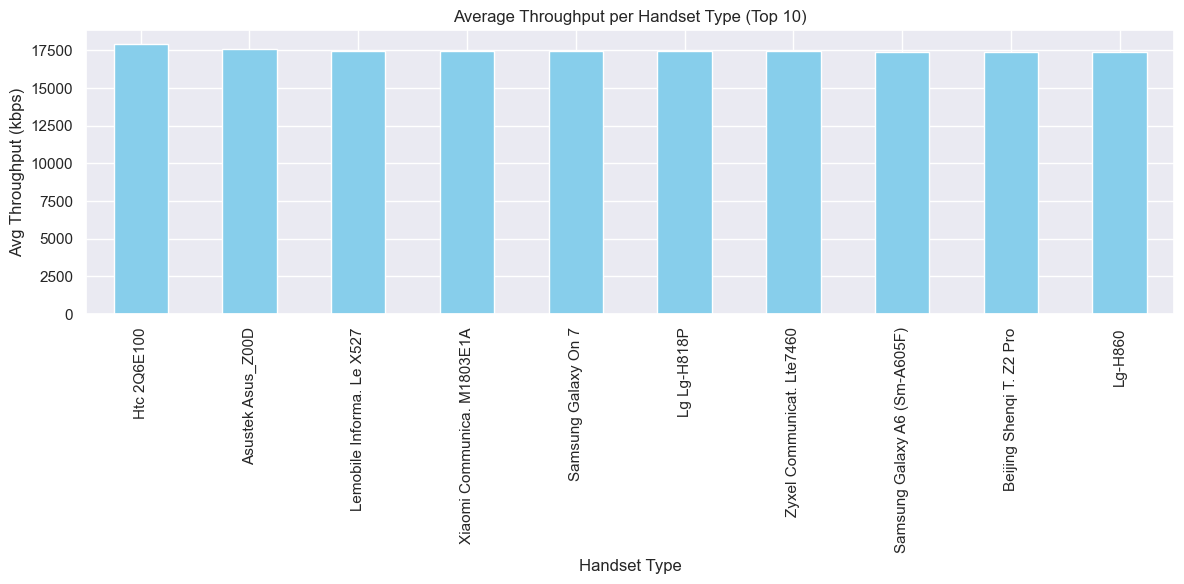

In [83]:
# Calculate average throughput per handset type
avg_throughput = df.groupby('Handset Type')['Avg Throughput (kbps)'].mean().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
avg_throughput.head(10).plot(kind='bar', color='skyblue')  # Top 10 for readability
plt.title('Average Throughput per Handset Type (Top 10)')
plt.xlabel('Handset Type')
plt.ylabel('Avg Throughput (kbps)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Interpretation:
## Handsets at the top are likely better performing or used in stronger network areas, resulting in higher throughput (faster data transfer). 
## Low-throughput devices may face slower speeds or network issues.

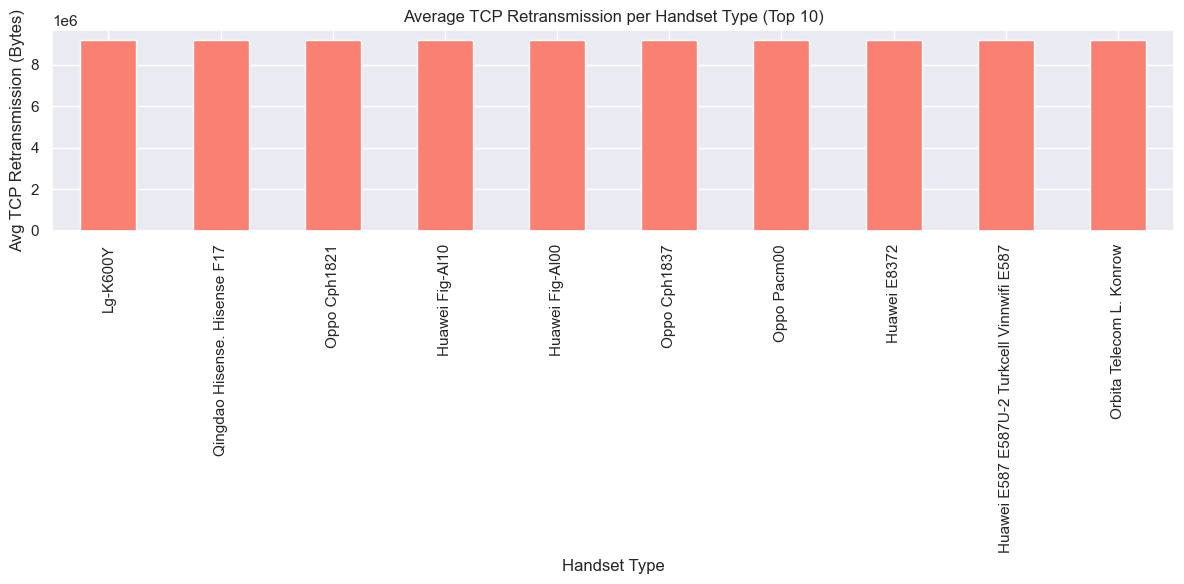

In [85]:
# If needed, create TCP retransmission column
df['Total TCP Retransmission (Bytes)'] = df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']

# Average TCP retransmission per handset type
avg_tcp_retrans = df.groupby('Handset Type')['Total TCP Retransmission (Bytes)'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
avg_tcp_retrans.head(10).plot(kind='bar', color='salmon')  # Top 10 for readability
plt.title('Average TCP Retransmission per Handset Type (Top 10)')
plt.xlabel('Handset Type')
plt.ylabel('Avg TCP Retransmission (Bytes)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Interpretation:
## Higher TCP retransmission usually indicates network problems like signal loss, delays, or hardware issues. 
## Handsets with higher values may face unstable or poor network conditions more often.

## Task3.4

In [88]:
df['Total TCP Retransmission (Bytes)'] = df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']

experience_df = df.groupby('MSISDN/Number').agg({
    'Total TCP Retransmission (Bytes)': 'mean',
    'Avg RTT (ms)': 'mean',
    'Avg Throughput (kbps)': 'mean'
}).reset_index()

scaler = MinMaxScaler()
experience_scaled = scaler.fit_transform(experience_df.drop('MSISDN/Number', axis=1))

# ✅ Assign correct column name
kmeans = KMeans(n_clusters=3, random_state=42)
experience_df['Experience Cluster'] = kmeans.fit_predict(experience_scaled)

# ✅ Add Experience Score
experience_df['Experience Score'] = experience_scaled.mean(axis=1)

# ✅ Merge into main df
df = pd.merge(df, experience_df[['MSISDN/Number', 'Experience Cluster', 'Experience Score']], on='MSISDN/Number', how='left')


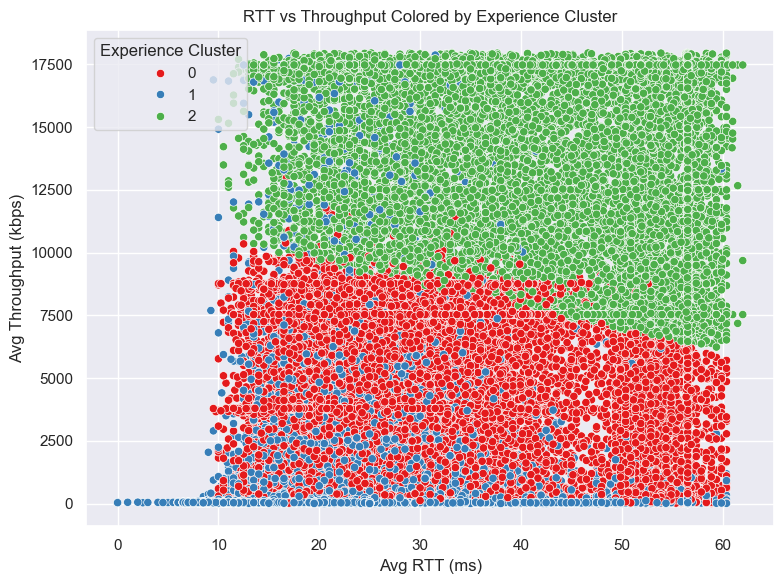

In [89]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=experience_df, x='Avg RTT (ms)', y='Avg Throughput (kbps)', hue='Experience Cluster', palette='Set1')
plt.title("RTT vs Throughput Colored by Experience Cluster")
plt.xlabel("Avg RTT (ms)")
plt.ylabel("Avg Throughput (kbps)")
plt.grid(True)
plt.tight_layout()
plt.show()


## Key insight

#### **- Cluster 0 (Red): Exhibits higher RTT and lower throughput, indicating poor performance.**
#### ** Cluster 1 (Green): Displays moderate RTT and higher throughput, signifying better performance.**
#### **- Cluster 2 (Blue): Has the lowest RTT but moderate throughput, reflecting average performance.**

## Task4.1 (a)

In [92]:
# Sample user_engagement data structure for demonstration (replace with actual data)
# Let's simulate engagement_df and the scaled version from previous clustering
np.random.seed(42)
sample_user_engagement = pd.DataFrame({
    'MSISDN/Number': range(1000, 1010),
    'session_frequency': np.random.randint(5, 50, 10),
    'total_session_duration': np.random.randint(10000, 100000, 10),
    'total_traffic': np.random.randint(1000000, 10000000, 10)
})

# Normalize engagement metrics
engagement_features = sample_user_engagement.drop('MSISDN/Number', axis=1)
scaler = StandardScaler()
engagement_scaled = scaler.fit_transform(engagement_features)

# Run k-means clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(engagement_scaled)
sample_user_engagement['engagement_cluster'] = clusters


cluster_centers = kmeans.cluster_centers_ #Returns the centers of the 3 clusters in scaled units.


# Identify the least engaged cluster: assuming lowest avg of total traffic
cluster_summary = pd.DataFrame(cluster_centers, columns=engagement_features.columns)
least_engaged_cluster_idx = cluster_summary['total_traffic'].idxmin() #Finds the cluster with the lowest average total traffic using idxmin() (assumed least engaged).
least_engaged_center = cluster_centers[least_engaged_cluster_idx]

# Calculate engagement score (Euclidean distance to least engaged cluster center)
engagement_scores = [euclidean(user, least_engaged_center) for user in engagement_scaled]
sample_user_engagement['engagement_score'] = engagement_scores
#For every user, calculates the Euclidean distance between the user's data and the least engaged cluster center.
#A higher score = user is farther from least engaged (i.e., more engaged).
#Appends this score as a new column engagement_score.

sample_user_engagement[['MSISDN/Number', 'engagement_cluster', 'engagement_score']]

MSISDN/Number  engagement_cluster  engagement_score
0           1000                   2          3.701384
1           1001                   2          3.433659
2           1002                   1          3.420544
3           1003                   0          0.000000
4           1004                   1          3.213379
5           1005                   1          3.987291
6           1006                   2          3.508935
7           1007                   1          3.730512
8           1008                   1          3.408510
9           1009                   1          3.707464

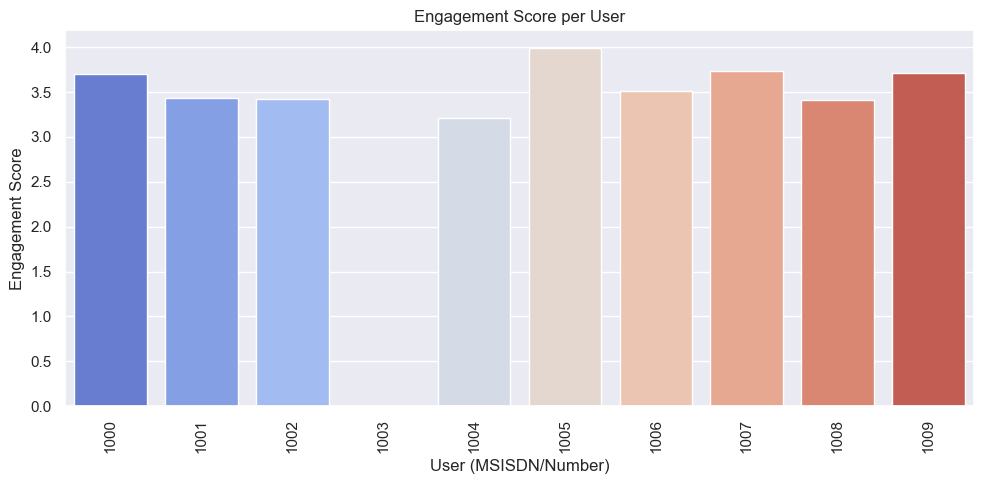

In [93]:
plt.figure(figsize=(10, 5))
sns.barplot(data=sample_user_engagement.sort_values('engagement_score', ascending=False), 
            x='MSISDN/Number', y='engagement_score', palette='coolwarm')
plt.title("Engagement Score per User")
plt.xlabel("User (MSISDN/Number)")
plt.ylabel("Engagement Score")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Key Insight
### **The bar chart displays the Engagement Score per User, where the engagement score is calculated based on how far a user's activity is from the least engaged user cluster (using Euclidean distance).**

## Observations:
#### **Users with higher bars (e.g., User 1005) are more engaged, meaning their usage behavior (frequency, session duration, total traffic) is significantly different (i.e., more active) from the least engaged group.**
#### **Users like 1004 have the lowest engagement score, suggesting behavior closer to the least active/least engaged cluster.**
#### **The color gradient helps visualize relative engagement — darker shades (red) indicate higher engagement, while lighter shades (blue) suggest lower engagement.**

## Conclusion:
#### **Users 1005, 1000, 1009 show stronger engagement and are potentially valuable or heavy users.**
#### **Users 1004, 1001, 1002 are less engaged, and may need targeted campaigns to boost usage or retain them.**
#### **This type of analysis helps segment customers for engagement strategies such as rewards, promotions, or support outreach.**

# Task 4.1 (b)

In [96]:
# 1. Select and aggregate experience-related metrics
df['Total TCP Retransmission (Bytes)'] = df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']

experience_df = df.groupby('MSISDN/Number').agg({
    'Total TCP Retransmission (Bytes)': 'mean',
    'Avg RTT (ms)': 'mean',
    'Avg Throughput (kbps)': 'mean'
}).reset_index()

# 2. Normalize the data
scaler = StandardScaler()
experience_scaled = scaler.fit_transform(experience_df.drop('MSISDN/Number', axis=1))

# 3. Run KMeans clustering (k = 3)
kmeans_exp = KMeans(n_clusters=3, random_state=42)
experience_df['experience_cluster'] = kmeans_exp.fit_predict(experience_scaled)

# 4. Identify the worst experience cluster
# Worst experience => highest retransmission + highest RTT + lowest throughput
cluster_centers_exp = pd.DataFrame(kmeans_exp.cluster_centers_, columns=['Retransmission', 'RTT', 'Throughput'])

# Higher retransmission + RTT and lower throughput = worst experience
cluster_centers_exp['score'] = cluster_centers_exp['Retransmission'] + cluster_centers_exp['RTT'] - cluster_centers_exp['Throughput']
worst_cluster_idx = cluster_centers_exp['score'].idxmax()
worst_cluster_center = kmeans_exp.cluster_centers_[worst_cluster_idx]

# 5. Compute experience score = Euclidean distance from worst cluster center
experience_scores = [euclidean(user, worst_cluster_center) for user in experience_scaled]
experience_df['experience_score'] = experience_scores

# 6. Show results
experience_df[['MSISDN/Number', 'experience_cluster', 'experience_score']].head()

MSISDN/Number  experience_cluster  experience_score
0   3.361671e+10                   1          2.168440
1   3.361671e+10                   1          3.728967
2   3.361672e+10                   0          1.530332
3   3.361672e+10                   1          2.781107
4   3.361672e+10                   1          2.128233

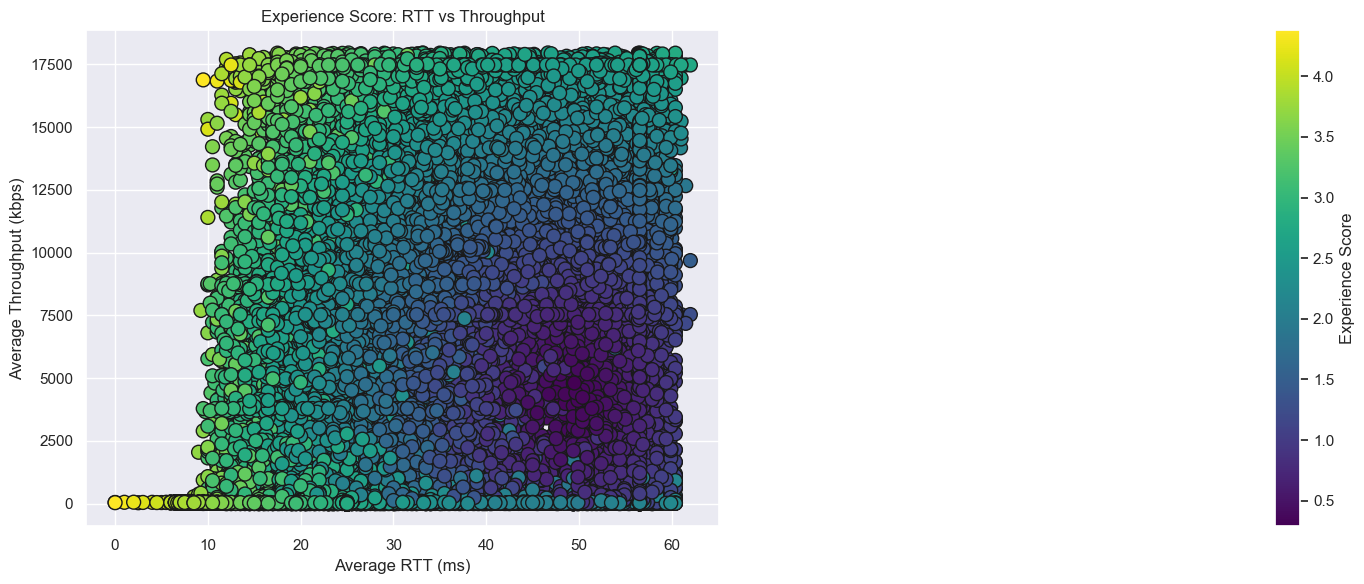

In [97]:
import matplotlib.pyplot as plt

# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Scatter plot on axs[0]
scatter_plot = axs[0].scatter(
    experience_df['Avg RTT (ms)'],
    experience_df['Avg Throughput (kbps)'],
    c=experience_df['experience_score'],
    cmap='viridis',
    s=100,
    edgecolor='k'
)

axs[0].set_title('Experience Score: RTT vs Throughput')
axs[0].set_xlabel('Average RTT (ms)')
axs[0].set_ylabel('Average Throughput (kbps)')

# Add colorbar to axs[1]
fig.colorbar(scatter_plot, ax=axs[1], label='Experience Score')
axs[1].axis('off')  # Optional: turn off unused subplot

plt.tight_layout()
plt.show()


## Key Insight
### The scatter plot shows the relationship between Average RTT (ms) and Average Throughput (kbps) for users, with color representing the Experience Score.

## Interpretation:
### Color Scale (Experience Score):
#### **Purple/dark = low experience score (i.e., worse user experience).**
#### **Yellow/light = high experience score (i.e., better user experience).**

### Observations:
#### **High RTT (Right side of the x-axis) generally corresponds to lower experience scores (darker colors), indicating worse experience.**
#### **Higher throughput (Upper y-axis) correlates with higher experience scores (lighter colors), showing that faster data speed improves experience.**
#### **Users with low RTT and high throughput (top-left region) tend to have the best experience scores (bright yellow).**
#### **Dense dark clusters around high RTT and low throughput areas suggest many users are experiencing performance issues.**

## Conclusion:
#### **Good Experience = Low RTT + High Throughput**
#### **Poor Experience = High RTT + Low Throughput**

## Task 4.2

In [100]:
# 1. Ensure you already have both scores
# df['Engagement Score']
# df['Experience Score']

# 2. Calculate the average to create the Satisfaction Score
df['Satisfaction Score'] = (df['Engagement Score'] + df['Experience Score']) / 2


# 3. Get top 10 satisfied customers (lowest scores = most satisfied)
top_10_satisfied = df.sort_values(by='Satisfaction Score').head(10)

# 4. Display the result
top_10_satisfied[['MSISDN/Number', 'Engagement Score', 'Experience Score', 'Satisfaction Score']]


MSISDN/Number  Engagement Score  Experience Score  Satisfaction Score
124538   3.366158e+10          0.000031          0.000789            0.000410
42602    3.365298e+10          0.000032          0.000928            0.000480
71738    3.366020e+10          0.000024          0.006425            0.003225
50966    3.369505e+10          0.000036          0.011876            0.005956
103544   3.365949e+10          0.000045          0.014165            0.007105
123210   3.366862e+10          0.000023          0.017066            0.008545
43760    3.364768e+10          0.000026          0.022526            0.011276
41321    3.367220e+10          0.000027          0.025038            0.012533
49429    3.363468e+10          0.000020          0.027745            0.013882
120870   3.362272e+10          0.000026          0.030470            0.015248

# Task 4.3

In [102]:
 # Define features (excluding identifiers and satisfaction score)
features = [
    'total_session_duration', 
    'Total Traffic (Bytes)', 
    'session_frequency',
    'Total TCP Retransmission', 
    'Avg RTT (ms)', 
    'Avg Throughput (kbps)'
]

# Drop NA values if any (optional)
df_model = df.dropna(subset=features + ['Satisfaction Score'])

X = df_model[features]
y = df_model['Satisfaction Score']


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [105]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📈 Mean Absolute Error (MAE): {mae:.4f}")
print(f"🔢 R-squared (R²): {r2:.4f}")


📈 Mean Absolute Error (MAE): 0.0162
🔢 R-squared (R²): 0.9742


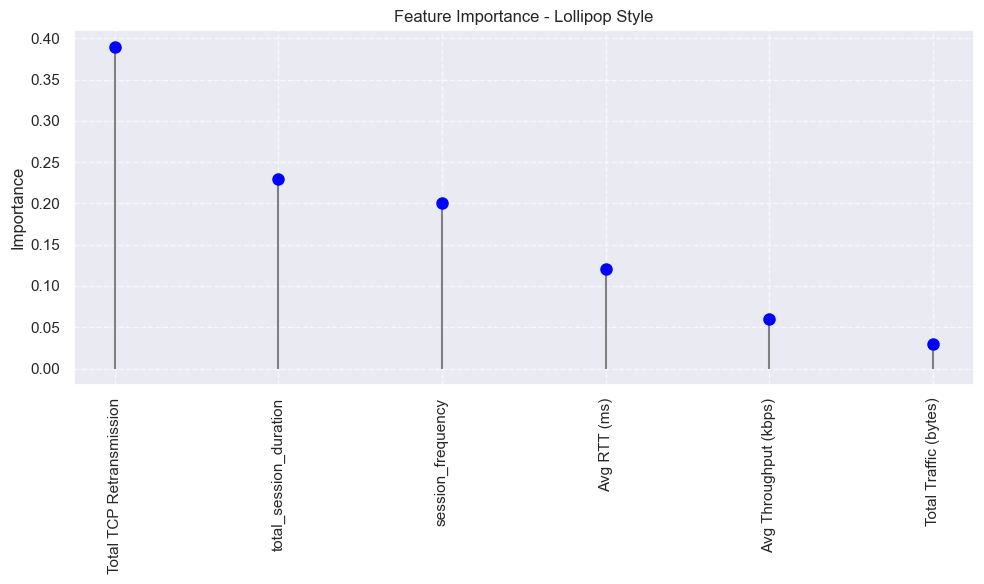

In [106]:
features = pd.DataFrame({
    'Features': ['Total TCP Retransmission', 'total_session_duration', 'session_frequency',
                 'Avg RTT (ms)', 'Avg Throughput (kbps)', 'Total Traffic (bytes)'],
    'Importance': [0.39, 0.23, 0.20, 0.12, 0.06, 0.03]
})


plt.figure(figsize=(10, 6))
markerline, stemlines, baseline = plt.stem(features['Features'], features['Importance'], basefmt=" ")
plt.setp(markerline, marker='o', markersize=8, color='blue')
plt.setp(stemlines, linestyle='-', color='gray')
plt.title("Feature Importance - Lollipop Style")
plt.xticks(rotation=90)
plt.ylabel("Importance")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Key Insights from the Graph:

## Top Influencer:
##### **Total TCP Retransmission is the most important feature by a significant margin.**
##### **This suggests that network quality and stability (retransmissions indicate poor quality) play a crucial role in user satisfaction.**

## Moderate Contributors:

##### **total_session_duration and session_frequency are the next important features.**
##### **This implies that how long and how often users engage with the service contributes moderately to satisfaction.**

## Lower Importance:
##### **Avg RTT (ms) and Avg Throughput (kbps) have lesser influence.**
##### **Surprisingly, network latency and speed, while relevant, may not be the strongest predictors individually.**

## Least Important:
##### **Total Traffic (Bytes) is the least important feature.**
##### **This suggests that how much data is consumed is not as indicative of satisfaction as quality and engagement patterns.**

## Implication for Stakeholders:
##### **Focus on improving network quality (reduce TCP retransmissions) and user engagement (increase session duration/frequency) to boost overall customer satisfaction.**

# Task 4.4

In [109]:
# Select the relevant columns
score_df = df[['Engagement Score', 'Experience Score']].copy()

# Fit KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
df['Satisfaction Cluster'] = kmeans.fit_predict(score_df)

# Check the result
df[['Engagement Score', 'Experience Score', 'Satisfaction Cluster']].head()

Engagement Score  Experience Score  Satisfaction Cluster
0          0.000058          0.503581                     0
1          0.000067          0.180493                     0
2          1.000000          0.367913                     1
3          1.000000          0.367913                     1
4          0.000029          0.134548                     0

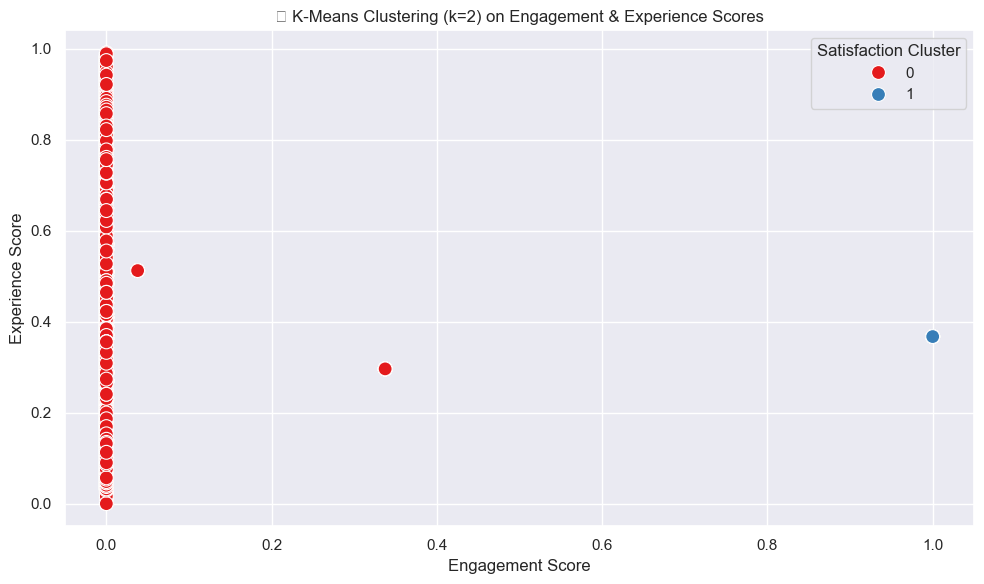

In [110]:
##Visualize the Clusters
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='Engagement Score', 
    y='Experience Score', 
    hue='Satisfaction Cluster', 
    palette='Set1',
    s=100
)
plt.title('🎯 K-Means Clustering (k=2) on Engagement & Experience Scores')
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.grid(True)
plt.tight_layout()
plt.show()


## Key Insights from the Graph:

## Cluster 0 (Red Points) - Majority of Users:
##### **These users have very low engagement scores (almost all are at 0).**
##### **Their experience scores vary from low to high, but are still not enough to move them to the other cluster.**
##### **This cluster likely represents unsatisfied or low-activity users.**

## Cluster 1 (Blue Points) - Very Few Users:
##### **These users have high engagement scores and moderate to low experience scores.**
##### **Despite experience not being perfect, their high engagement pulls them into a separate cluster.**
##### **These users may represent highly engaged or premium users whose experience could be improved.**

## Severe Imbalance in Clusters:
##### **Almost all users belong to Cluster 0, suggesting that most of the customer base is not actively engaging with the service.**
##### **Very few are in Cluster 1, indicating a potential issue with user engagement across the board.**

## Business Implication:
##### **There is a large portion of users with minimal engagement, even if their experience is sometimes acceptable.**
##### **Immediate action: Focus on strategies to boost engagement, especially for users who are having a good experience but aren't interacting much.**

In [112]:
##Cluster 0 might represent users with low engagement and poor experience.

##Cluster 1 might group users who are highly engaged and satisfied.

##You can analyze the centroids or describe each cluster with:
df.groupby('Satisfaction Cluster')[['Engagement Score', 'Experience Score']].mean()


Engagement Score  Experience Score
Satisfaction Cluster                                    
0                              0.02312          0.367212
1                              1.00000          0.367913

# Task 4.5

In [114]:
# Make sure Satisfaction Score column exists

# Aggregate average scores per cluster
cluster_scores = df.groupby('Satisfaction Cluster')[['Satisfaction Score', 'Experience Score']].mean().reset_index()

print(cluster_scores)

   Satisfaction Cluster  Satisfaction Score  Experience Score
0                     0            0.195166          0.367212
1                     1            0.683957          0.367913


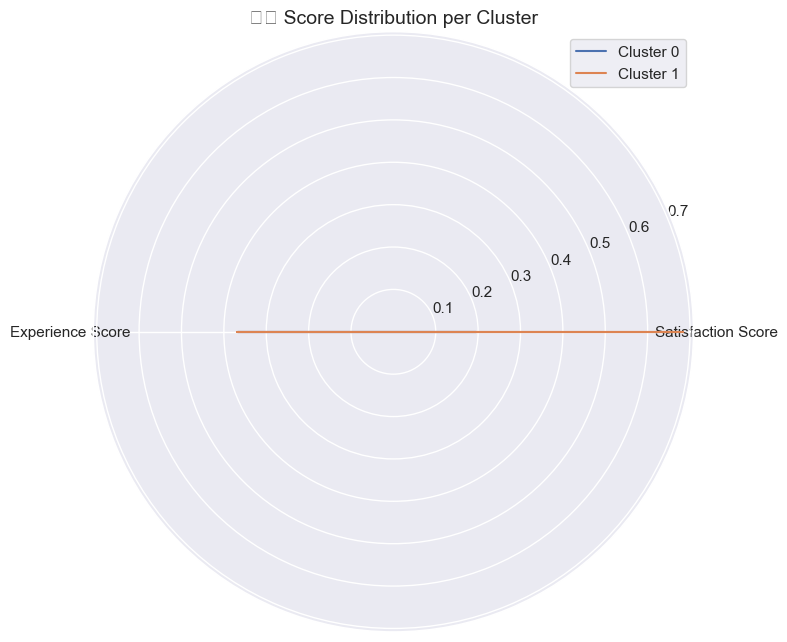

In [115]:
import numpy as np

# Prepare data
categories = list(cluster_scores.columns[1:])
labels = cluster_scores['Satisfaction Cluster']
num_vars = len(categories)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # complete the loop

plt.figure(figsize=(8, 8))

for i, row in cluster_scores.iterrows():
    values = row[1:].tolist()
    values += values[:1]
    plt.polar(angles, values, label=f"Cluster {int(row[0])}")

plt.xticks(angles[:-1], categories)
plt.title("🕸️ Score Distribution per Cluster", size=14)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


## Key Insights from the Graph:

## Cluster 0 (Blue) and Cluster 1 (Orange) Overlap Completely:
##### **The two clusters seem to have very similar average scores for both Experience Score and Satisfaction Score.**
##### **This is evident because the two lines (representing each cluster) perfectly overlap, appearing as a single line.**

## Low Overall Scores:
##### **Both scores remain below 0.2, which implies that on average:**
##### **Users across both clusters are not very satisfied.**
##### **Their experience with the service is also poor.**

## Business Implication:
##### **There is very little differentiation between the clusters based on Experience and Satisfaction scores.**
##### **More effort is needed to improve user satisfaction and experience regardless of engagement cluster.**
## It also suggests that either:
##### **The clustering may be more influenced by Engagement Score (as seen in the previous plot), or**
##### **These two metrics (Experience and Satisfaction) do not vary significantly between user groups.**

In [117]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [118]:
df.to_csv('E:/New folder/telcom_data2.csv')

In [119]:
import mysql.connector
from sqlalchemy import create_engine

In [ ]:
!pip install mysql-connector-python

In [ ]:
import pyodbc
print(pyodbc.drivers())


In [ ]:
from sqlalchemy import create_engine
engine = create_engine(
    "mssql+pyodbc://@localhost\\SQLEXPRESS/YourDatabaseName?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes&TrustServerCertificate=yes"
)


In [ ]:
import pyodbc
print(pyodbc.drivers())


In [ ]:
import pandas as pd
from sqlalchemy import create_engine

# Replace with the correct driver shown from pyodbc.drivers()
engine = create_engine(
    "mssql+pyodbc://@localhost\\SQLEXPRESS/master?driver=ODBC+Driver+18+for+SQL+Server&trusted_connection=yes&TrustServerCertificate=yes"
)

# Sample query to test connection
df = pd.read_sql("SELECT name FROM sys.databases", engine)
print(df)


In [ ]:
engine = create_engine(
    "mssql+pyodbc://localhost\\SQLEXPRESS/master?driver=ODBC+Driver+18+for+SQL+Server&trusted_connection=yes&TrustServerCertificate=yes"
)


In [ ]:
# Connect to the newly created test_db
engine_testdb = create_engine(
    "mssql+pyodbc://localhost\\SQLEXPRESS/test_db?driver=ODBC+Driver+18+for+SQL+Server&trusted_connection=yes&TrustServerCertificate=yes"
)


In [ ]:
df = pd.read_sql("SELECT name FROM sys.tables", engine_testdb)
print(df)


In [ ]:
df = df.rename(columns={
    'User ID': 'user_id',
    'Engagement Score': 'engagement_score',
    'Experience Score': 'experience_score',
    'Satisfaction Score': 'satisfaction_score'
})


In [ ]:
from sqlalchemy import create_engine, text

engine = create_engine(
    "mssql+pyodbc://@localhost\\SQLEXPRESS/test_db?driver=ODBC+Driver+18+for+SQL+Server&trusted_connection=yes&TrustServerCertificate=yes"
)

with engine.connect() as conn:
    conn.execute(text("""
        IF NOT EXISTS (
            SELECT * FROM sysobjects 
            WHERE name='user_scores' AND xtype='U'
        )
        CREATE TABLE user_scores (
            user_id BIGINT PRIMARY KEY,
            engagement_score FLOAT,
            experience_score FLOAT,
            satisfaction_score FLOAT
        )
    """))
    conn.commit()

print("Table 'user_scores' created successfully.")


In [ ]:
from sqlalchemy import create_engine, text

engine = create_engine(
    "mssql+pyodbc://localhost\\SQLEXPRESS/test_db?driver=ODBC+Driver+18+for+SQL+Server&trusted_connection=yes&TrustServerCertificate=yes"
)


In [ ]:
import pandas as pd

# Read table into a DataFrame
query = "SELECT * FROM user_scores"
df = pd.read_sql(query, con=engine)

# Display the result
print(df)


In [ ]:
from sqlalchemy import text

sample_data = [
    (1004, 8.5, 7.2, 8.0),
    (1005, 6.7, 6.9, 6.5),
    (1006, 9.1, 8.8, 9.0)
]

with engine.connect() as conn:
    for row in sample_data:
        user_id = row[0]
        check = conn.execute(
            text("SELECT COUNT(*) FROM user_scores WHERE user_id = :user_id"),
            {"user_id": user_id}
        ).scalar()
        
        if check == 0:
            conn.execute(text("""
                INSERT INTO user_scores (user_id, engagement_score, experience_score, satisfaction_score)
                VALUES (:user_id, :engagement_score, :experience_score, :satisfaction_score)
            """), {
                "user_id": user_id,
                "engagement_score": row[1],
                "experience_score": row[2],
                "satisfaction_score": row[3]
            })

    conn.commit()

print("Sample data inserted successfully.")


In [ ]:
query = "SELECT * FROM user_scores"
df = pd.read_sql(query, con=engine)
print(df)
